In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import pickle
import os

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['hist.bins'] = 100
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 2.5
mpl.rcParams['grid.alpha'] = 0.2

In [3]:
pth = '/home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/'

In [4]:
conv = 1e-27*0.389379304 # [GeV*cm^2]<-- conversion factor for xsec[GeV^-2] -> xsec[cm^2]

In [5]:
def read_xsec_from_dat_file(pth, name, ftype = '.dat'):
    
    filename = pth + name + ftype
    print ('reading file: ', filename)
    
    datContent = [i.strip().split() 
                  for i in open(filename).readlines()]
    
    dat_nedges = int(datContent[0][0])
    dat_st_bins = int(datContent[0][2])
    dat_end_bins = int(datContent[0][3])

    dat_lgE_bins = np.linspace(dat_st_bins, dat_end_bins, dat_nedges)
    dat_lgE_bin_centers = dat_lgE_bins[:-1]# + (dat_lgE_bins[1] - dat_lgE_bins[0])/2.

    dat_xsec = [float(datContent[i][0]) for i in range(1, len(datContent)-1)]
    dat_xsec = np.array(dat_xsec) * 1.0e-27

    return dat_lgE_bin_centers, dat_xsec

def read_list_xsec_dat_files(pth, names, ftype='.dat'):
    
    d = {}
    for i in range(len(names)):
        name = names[i]
        
        dat_lgE_bin_centers, dat_xsec = read_xsec_from_dat_file(pth, name, ftype=ftype)
        dat_xsec_per_E = dat_xsec/10.**(dat_lgE_bin_centers)
        
        d[name] = {'lgE':dat_lgE_bin_centers, 'xsec':dat_xsec, 'xsec_per_E':dat_xsec_per_E}
        
    return d

In [6]:
pth_csms_dat = '/home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/'
names_csms_dat = ['total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG',
                  'total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG',
                  'total_nu_CC_iso_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_iso_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_iso_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_iso_NLO_HERAPDF1.5NLO_EIG']

xsec_csms0 = read_list_xsec_dat_files(pth=pth_csms_dat, names=names_csms_dat)

reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_co

In [7]:
xsec_csms = {'tgt':[], 'nu':[], 'CC':[], 'lgE':[], 'xsec':[], 'xsec_per_E':[]}

for k in xsec_csms0.keys():
    
        print (k)
    
        st_nu = k.find('total_') +len('total_')
        end_nu = st_nu + k[st_nu:].find('_')
        nustr = k[st_nu:end_nu]
        print (k[st_nu:])
        if nustr == 'nu':
            nu = 1
        elif nustr == 'nubar':
            nu = -1
        else:
            print ('error! nu isnt nu or nubar: ', nustr)
        xsec_csms['nu'].append(nu)
        print (nustr, nu)
        
        st_curr = k.find(nustr+'_') + len(nustr+'_')
        end_curr = st_curr + k[st_curr:].find('_')
        if k[st_curr:end_curr] == 'CC':
            cc = 1
        elif k[st_curr:end_curr] == 'NC':
            cc = 0
        else:
            cc = -1
        xsec_csms['CC'].append(cc)        
        print (k[st_curr:end_curr], cc)
    
        st_tgt = end_curr + 1
        end_tgt = st_tgt + k[st_tgt:].find('_')
        if k[st_tgt:end_tgt] == 'p':
            tgt = 2212
        elif k[st_tgt:end_tgt] == 'n':
            tgt = 2112
        elif k[st_tgt:end_tgt] == 'iso':
            tgt = 0
        else:
            print ('error! tgt wasnt found correctly: ', k[st_tgt])
        xsec_csms['tgt'].append(tgt)
        print (tgt)

        xsec_csms['lgE'].append(xsec_csms0[k]['lgE'])
        xsec_csms['xsec'].append(xsec_csms0[k]['xsec'])
        xsec_csms['xsec_per_E'].append(xsec_csms0[k]['xsec_per_E'])
        
for k in xsec_csms.keys():
    xsec_csms[k] = np.array(xsec_csms[k])

total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG
nu_CC_p_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
2212
total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG
nu_NC_p_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
2212
total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG
nubar_NC_p_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
2212
total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG
nubar_CC_p_NLO_HERAPDF1.5NLO_EIG
nubar -1
CC 1
2212
total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG
nu_CC_n_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
2112
total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG
nu_NC_n_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
2112
total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG
nubar_NC_n_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
2112
total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG
nubar_CC_n_NLO_HERAPDF1.5NLO_EIG
nubar -1
CC 1
2112
total_nu_CC_iso_NLO_HERAPDF1.5NLO_EIG
nu_CC_iso_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
0
total_nu_NC_iso_NLO_HERAPDF1.5NLO_EIG
nu_NC_iso_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
0
total_nubar_NC_iso_NLO_HERAPDF1.5NLO_EIG
nubar_NC_iso_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
0
total_nubar_CC_iso_NLO_HERAPDF1.5NLO_EIG
nubar_CC_iso_NL

In [8]:
def tgt_by_Npdg(hitN):
    if hitN == 2212:
        return 1000010010
    elif hitN == 2112:
        return 1000000010
    else:
        return 1
    
def get_title(pdg, hitN, CC):
    nuname = {12:'NuE',14:'NuMu',16:'NuTau',
              -12:'NuEBar',-14:'NuMuBar',-16:'NuTauBar'}
    CC_name = {1:'CC',0:'NC'}
    hitN_name = {2212:'protons',2112:'neutrons'}
    
    return nuname[pdg]+' '+CC_name[CC]+': '+hitN_name[hitN]

# iso

In [9]:
def plot_def_csms(ax, xsec=xsec_csms, nu=14, hitN=2212, curr=1, linestyle='-'):
    
    nu_sign = int(nu/np.abs(nu))
    
    ind = (xsec['nu']==nu_sign)*\
    (xsec['tgt']==int(hitN))*(xsec['CC']==int(curr))
    
    ax.plot(xsec['lgE'][ind][0], xsec['xsec_per_E'][ind][0],
         c='k', linestyle=linestyle, label='CSMS(paper)')
    
    return 0

def plot_ind_iso(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt_p = tgt_by_Npdg(2212)
    tgt_n = tgt_by_Npdg(2112)

    ind_base = (genie['pdg']==pdg)*(genie['CC']==CC)*\
    (((genie['hitN']==2212)*(genie['tgt']==tgt_p))^((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv/2.,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv/2.,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0

# p/n

In [24]:
def get_ind(filename, pdg=14, hitN=2212, CC=1):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
            
    if 'int_hedis' in genie.keys():
        gen = 'hedis'
    else:
        gen = 'genie'
            
    tgt = tgt_by_Npdg(hitN)

    ind_base0 = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    if gen == 'hedis':
        ind_base = ind_base0*(np.abs(genie['finalqrk'])<4)
    elif gen == 'genie':
        ind_base = ind_base0*(genie['charm_incl']!=1)
    
    ind_sea = ind_base*(genie['sea']==1)
    ind_val = ind_base*(genie['sea']==0)
    
    lgE = np.log10(genie['E_fit'])
    xsec_base = np.sum(genie['xsec_fits'][ind_base], axis=0)*conv
    xsec_sea = np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv
    xsec_val = np.sum(genie['xsec_fits'][ind_val], axis=0)*conv
    
    return lgE, xsec_base, xsec_sea, xsec_val, gen

def plot_ind(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
        
    lgE, xsec_base, xsec_sea, xsec_val, gen = get_ind(filename, pdg=pdg, hitN=hitN, CC=CC)   
    
    if gen == 'hedis':
        gen_label = hedis_model+'(HEDIS)'
    elif gen == 'genie':
        gen_label = 'GENIE'+genie_det
    
    ax.plot(lgE, xsec_base,
            c='red', linestyle=linestyle, label='total')
    ax.plot(lgE, xsec_sea,
            c='orange', linestyle=linestyle, label='sea')
    ax.plot(lgE, xsec_val,
            c='green', linestyle=linestyle, label='valence')
    
    return gen_label

def plot_ind_ratio_sea_val(ax, filename, pdg=14, hitN=2212, CC=1, linestyle='-'):

    lgE, _, xsec_sea, xsec_val, _ = get_ind(filename, pdg=pdg, hitN=hitN, CC=CC)
        
    ax.plot(lgE, xsec_sea/xsec_val,
            c='blue', linestyle=linestyle)
    
    return 0

def plot_unit(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], linestyles=['-','--','-.',':'],
             plot_csms=True, plot_iso=False):
    f, axs = plt.subplots(figsize=(16,40), facecolor='w')
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(4):
        for j in range(2):
            ax = plt.subplot2grid((24, 2), (4*i, j), rowspan=2) 
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,1.0e-38)
                
            for k in range(len(fnames)):
                if not plot_iso:
                    gen_label = plot_ind(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                                         hedis_model=hedis_model[k], genie_det=genie_det[k], 
                                         linestyle=linestyles[k])
                else:
                    plot_ind_iso(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                             hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
                
            if plot_csms:
                if not plot_iso:
                    plot_def_csms(ax, nu=pdg[i], hitN=hitN[j], curr=CC[i], linestyle='-')
                else:
                    plot_def_csms(ax, nu=pdg[i], hitN=0, curr=CC[i], linestyle=':')

            if i==0 and j==0:
                plt.legend(ncol=1, fontsize=12)
                
            ax1 = plt.subplot2grid((24, 2), (4*i+2, j), rowspan=1, sharex=ax)
            plt.sca(ax1)
            plt.grid()
            ax1.set_xlabel('log10(E/GeV)')
            ax1.set_ylabel('sea/val')
            ax1.set_ylim(0.,3.)
            ax1.axhline(1.,c='grey')
            
            for k in range(len(fnames)):
                plot_ind_ratio_sea_val(ax1, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
#                                        hedis_model=hedis_model[k], genie_det=genie_det[k], 
                                       linestyle=linestyles[k])
    f.suptitle(gen_label, y=0.9, fontsize=16)
#     plt.tight_layout()
    savename = 'plots_charm_Q2min1/'+subfld+'nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')#+'.pdf'
    plt.savefig(savename+'.pdf', dpi='figure', bbox_inches='tight')
    plt.savefig(savename+'.png', dpi='figure', bbox_inches='tight')
    plt.show()

    return 0

In [25]:
def plot_ratio_ind(ax, filename, 
                   filename_base='GENIE_2_12_8_water_splines_highen_Wcut0_Q2min1_v2_fits.pckl', 
                   pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
        
    lgE, xsec_base, xsec_sea, xsec_val, gen = get_ind(filename, pdg=pdg, hitN=hitN, CC=CC)
    _, xsec_base_base, xsec_sea_base, xsec_val_base, gen_base = get_ind(filename_base, pdg=pdg, hitN=hitN, CC=CC)   
    
    if gen == 'hedis':
        gen_label = hedis_model+'(HEDIS)'
    elif gen == 'genie':
        gen_label = 'GENIE'+genie_det
    if gen_base == 'hedis':
        gen_label_base = hedis_model+'(HEDIS)'
    elif gen_base == 'genie':
        gen_label_base = 'GENIE'+genie_det
    
    name_info = gen_label+'/'+gen_label_base

    ax.plot(lgE, xsec_base/xsec_base_base,
            c='red', linestyle=linestyle, label='total')
    ax.plot(lgE, xsec_sea/xsec_sea_base,
            c='orange', linestyle=linestyle, label='sea')
    ax.plot(lgE, xsec_val/xsec_val_base,
            c='green', linestyle=linestyle, label='valence')
    
    return gen_label

def plot_ratio_ind_ratio_sea_val(ax, filename, 
                                 filename_base='GENIE_2_12_8_water_splines_highen_Wcut0_Q2min1_v2_fits.pckl',
                                 pdg=14, hitN=2212, CC=1, linestyle='-'):

    lgE, _, xsec_sea, xsec_val, _ = get_ind(filename, pdg=pdg, hitN=hitN, CC=CC)
    _, _, xsec_sea_base, xsec_val_base, _ = get_ind(filename_base, pdg=pdg, hitN=hitN, CC=CC)
        
    ratio = (xsec_sea/xsec_val) / (xsec_sea_base/xsec_val_base)
        
    ax.plot(lgE, ratio,
            c='blue', linestyle=linestyle)
    
    return 0

def plot_ratios(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], 
                linestyles=['-','--','-.',':'],
                plot_iso=False,
                filename_base='GENIE_2_12_8_water_splines_highen_Wcut0_Q2min1_v2_fits.pckl'):
    f, axs = plt.subplots(figsize=(16,40), facecolor='w')
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(4):
        for j in range(2):
            ax = plt.subplot2grid((24, 2), (4*i, j), rowspan=2) 
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/\sigma_{tot}^{GENIE}}}$')
            ax.axhline(1.,c='grey')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,2.)
                
            for k in range(len(fnames)):
                if not plot_iso:
                    gen_label = plot_ratio_ind(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                                               hedis_model=hedis_model[k], genie_det=genie_det[k], 
                                               linestyle=linestyles[k], filename_base=filename_base)
                else:
                    plot_ind_iso(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                             hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
                
            if i==0 and j==0:
                plt.legend(ncol=1, fontsize=12)
                
            ax1 = plt.subplot2grid((24, 2), (4*i+2, j), rowspan=1, sharex=ax)
            plt.sca(ax1)
            plt.grid()
            ax1.set_xlabel('log10(E/GeV)')
            ax1.set_ylabel(r'$\frac{sea/val}{(sea/val)^{GENIE}}$')
            ax1.set_ylim(0.,3.)
            ax1.axhline(1.,c='grey')
            
            for k in range(len(fnames)):
                plot_ratio_ind_ratio_sea_val(ax1, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
#                                        hedis_model=hedis_model[k], genie_det=genie_det[k], 
                                       linestyle=linestyles[k])
    f.suptitle(gen_label, y=0.9, fontsize=16)
    savename = 'plots_charm_Q2min1/'+subfld+'ratio_nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')#+'.pdf'
    plt.savefig(savename+'.pdf', dpi='figure', bbox_inches='tight')
    plt.savefig(savename+'.png', dpi='figure', bbox_inches='tight')
    plt.show()

    return 0

In [26]:
qrk_from_pdg = {-1:r'$\bar{d}$',
                -2:r'$\bar{u}$',
                -3:r'$\bar{s}$',
                -4:r'$\bar{c}$', 
                -5:r'$\bar{b}$',
                1:'d', 
                2:'u',
                3:'s', 
                4:'c', 
                5:'b'}

In [27]:
clrs_val = {1:'darkgreen', 2:'lime'}
clrs_sea = {-1:'deeppink',
            -2:'red',
            -3:'orange',
            -4:'gold', 
            -5:'yellow',
            1:'deeppink', 
            2:'red',
            3:'orange', 
            4:'gold', 
            5:'yellow'}

ls_val  = {1:'-', 2:'-'}
ls_sea  = {-1:':',
           -2:':',
           -3:':',
           -4:':', 
           -5:':',
           1:'--', 
           2:'--',
           3:'--', 
           4:'--', 
           5:'--'}

In [28]:
clrs_val = {1:'purple', 2:'magenta'}
clrs_sea = {-1:'red',
            -2:'gold',
            -3:'lime',
            -4:'green', 
            -5:'darkblue',
            1:'red', 
            2:'gold',
            3:'lime', 
            4:'green', 
            5:'darkblue'}

ls_val  = {1:'-', 2:'-'}
ls_sea  = {-1:':',
           -2:':',
           -3:':',
           -4:':', 
           -5:':',
           1:'--', 
           2:'--',
           3:'--', 
           4:'--', 
           5:'--'}

In [29]:
with open(os.path.join(pth,'GENIE_2_12_8_water_splines_highen_fits.pckl'), 'rb') as f:
    genie = pickle.load(f, encoding='latin1')

In [17]:
for k in genie.keys():
    genie[k] = np.array(genie[k])

In [17]:
genie.keys()

dict_keys(['sea', 'tgt', 'CC', 'full_name', 'xsec_fits', 'xsec_init', 'hitN', 'E_init', 'charm_incl', 'E_fit', 'hitqrk', 'pdg', 'dis'])

In [18]:
genie.keys()

dict_keys(['sea', 'tgt', 'CC', 'full_name', 'xsec_fits', 'xsec_init', 'hitN', 'E_init', 'charm_incl', 'E_fit', 'hitqrk', 'pdg', 'dis'])

In [19]:
genie['finalqrk']

KeyError: 'finalqrk'

In [ ]:
genie['charm_incl']

In [40]:
(np.abs(genie['finalqrk'])==3)*(genie['tgt']==1000010010)*(genie['pdg']==14)*(genie['hitN']==2212)*(genie['sea']==0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [48]:
(np.abs(genie['charm_incl'])==1)*(genie['tgt']==1000010010)*(genie['pdg']==14)*(genie['hitN']==2212)*(genie['sea']==1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [30]:
def get_ind_q(filename, pdg=14, hitN=2212, CC=1):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
            
    if 'int_hedis' in genie.keys():
        gen = 'hedis'
    else:
        gen = 'genie'
            
    tgt = tgt_by_Npdg(hitN)

    ind_base0 = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    if gen == 'hedis':
        ind_base = ind_base0*(np.abs(genie['finalqrk'])<4)
    elif gen == 'genie':
        ind_base = ind_base0*(genie['charm_incl']!=1)
    
    ind_sea = ind_base*(genie['sea']==1)
    ind_val = ind_base*(genie['sea']==0)
    
    lgE = np.log10(genie['E_fit'])
    
    xsec_val = {}
    for q in [1,2]:
        xsec_val[q] = np.sum(genie['xsec_fits'][ind_val*(genie['hitqrk']==q)], axis=0)*conv
        
    xsec_sea = {}
    for q in [-5,-4,-3,-2,-1,1,2,3,4,5]:
        xsec_sea[q] = np.sum(genie['xsec_fits'][ind_sea*(genie['hitqrk']==q)], axis=0)*conv
    
    return lgE, xsec_sea, xsec_val, gen

def plot_ind_q(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det=''):
        
    lgE, xsec_sea, xsec_val, gen = get_ind_q(filename, pdg=pdg, hitN=hitN, CC=CC)   
    
    if gen == 'hedis':
        gen_label = hedis_model+'(HEDIS)'
    elif gen == 'genie':
        gen_label = 'GENIE'+genie_det
        
    for q in [1,2]:
        ax.plot(lgE, xsec_val[q],
                c=clrs_val[q], linestyle=ls_val[q], label='val: '+qrk_from_pdg[q])
        
    for q in [-5,-4,-3,-2,-1,1,2,3,4,5]:
        ax.plot(lgE, xsec_sea[q],
                c=clrs_sea[q], linestyle=ls_sea[q], label='sea: '+qrk_from_pdg[q])
    
    return gen_label

def plot_ratio_ind_q(ax, filename, 
                     filename_base='GENIE_2_12_8_water_splines_highen_Wcut0_Q2min1_v2_fits.pckl',
                     pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det=''):
        
    lgE, xsec_sea, xsec_val, gen = get_ind_q(filename, pdg=pdg, hitN=hitN, CC=CC)   
    _, xsec_sea_base, xsec_val_base, _ = get_ind_q(filename_base, pdg=pdg, hitN=hitN, CC=CC)   
    
    if gen == 'hedis':
        gen_label = hedis_model+'(HEDIS)'
    elif gen == 'genie':
        gen_label = 'GENIE'+genie_det
        
    for q in [1,2]:
        ratio = xsec_val[q]/xsec_val_base[q]
        ax.plot(lgE, ratio,
                c=clrs_val[q], linestyle=ls_val[q], label='val: '+qrk_from_pdg[q])
        
    for q in [-5,-4,-3,-2,-1,1,2,3,4,5]:
        ratio = xsec_sea[q]/xsec_sea_base[q]
        ax.plot(lgE, ratio,
                c=clrs_sea[q], linestyle=ls_sea[q], label='sea: '+qrk_from_pdg[q])
    
    return gen_label

def plot_unit_q(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['','']):
    f, axs = plt.subplots(figsize=(16,28), facecolor='w')
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(4):
        for j in range(2):
            ax = plt.subplot2grid((4, 2), (i, j)) 
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')
            ax.set_xlabel('log10(E/GeV)')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,1.0e-38)
                
            for k in range(len(fnames)):
                gen_label = plot_ind_q(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                                       hedis_model=hedis_model[k], genie_det=genie_det[k])
                
            if i==0 and j==0:
                plt.legend(ncol=3, fontsize=12)
                
    f.suptitle(gen_label, y=0.9, fontsize=16)
    
    savename = 'plots_charm_Q2min1/'+subfld+'q_nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')#+'.pdf'
    plt.savefig(savename+'.pdf', dpi='figure', bbox_inches='tight')
    plt.savefig(savename+'.png', dpi='figure', bbox_inches='tight')
    plt.show()

    return 0

def plot_ratios_q(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], 
                  filename_base='GENIE_2_12_8_water_splines_highen_Wcut0_Q2min1_v2_fits.pckl'):
    f, axs = plt.subplots(figsize=(16,28), facecolor='w')
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(4):
        for j in range(2):
            ax = plt.subplot2grid((4, 2), (i, j)) 
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/\sigma_{tot}^{GENIE}}}$')
            ax.set_xlabel('log10(E/GeV)')
            ax.axhline(1.,c='grey')
            
            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,3.)
                
            for k in range(len(fnames)):
                gen_label = plot_ratio_ind_q(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                                             hedis_model=hedis_model[k], genie_det=genie_det[k],
                                             filename_base=filename_base)
                
            if i==0 and j==0:
                plt.legend(ncol=3, fontsize=12)
                
    f.suptitle(gen_label, y=0.9, fontsize=16)
    
#     plt.tight_layout()
    savename = 'plots_charm_Q2min1/'+subfld+'q_ratio_nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')#+'.pdf'
    plt.savefig(savename+'.pdf', dpi='figure', bbox_inches='tight')
    plt.savefig(savename+'.png', dpi='figure', bbox_inches='tight')
    plt.show()

    return 0

In [31]:
subfld = 'not_charm/'

In [19]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_Wcut0_Q2min1_v2_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']
linestyles=['-','--','-.',':']

# st units x4

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


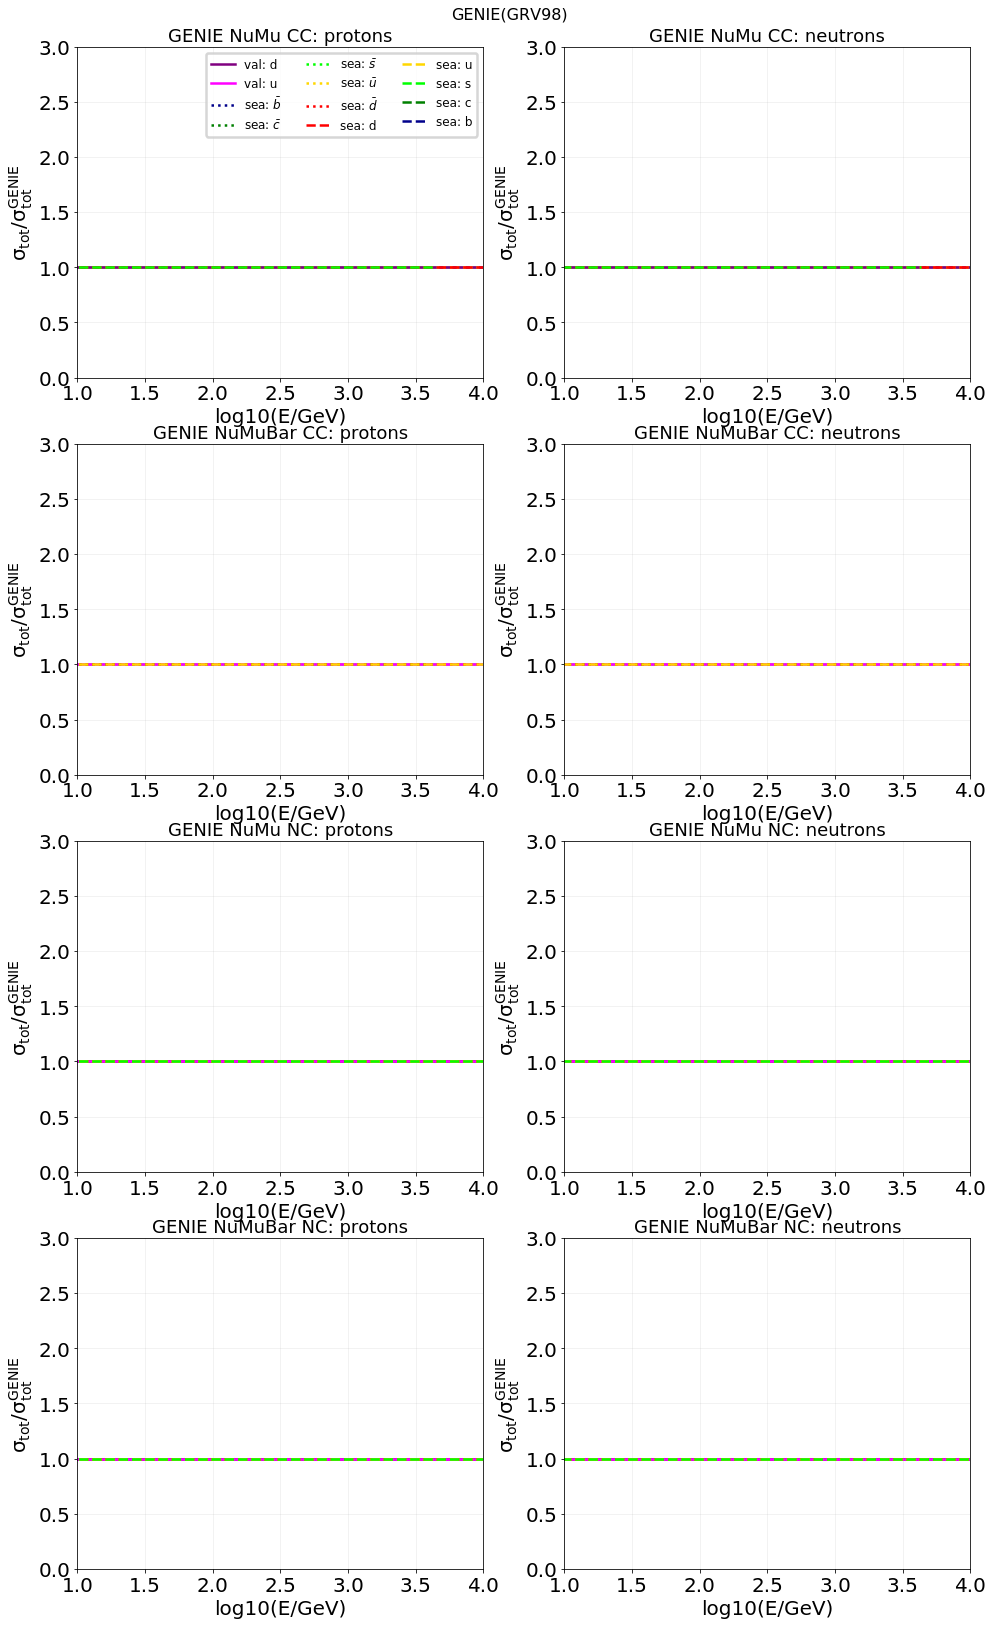

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide


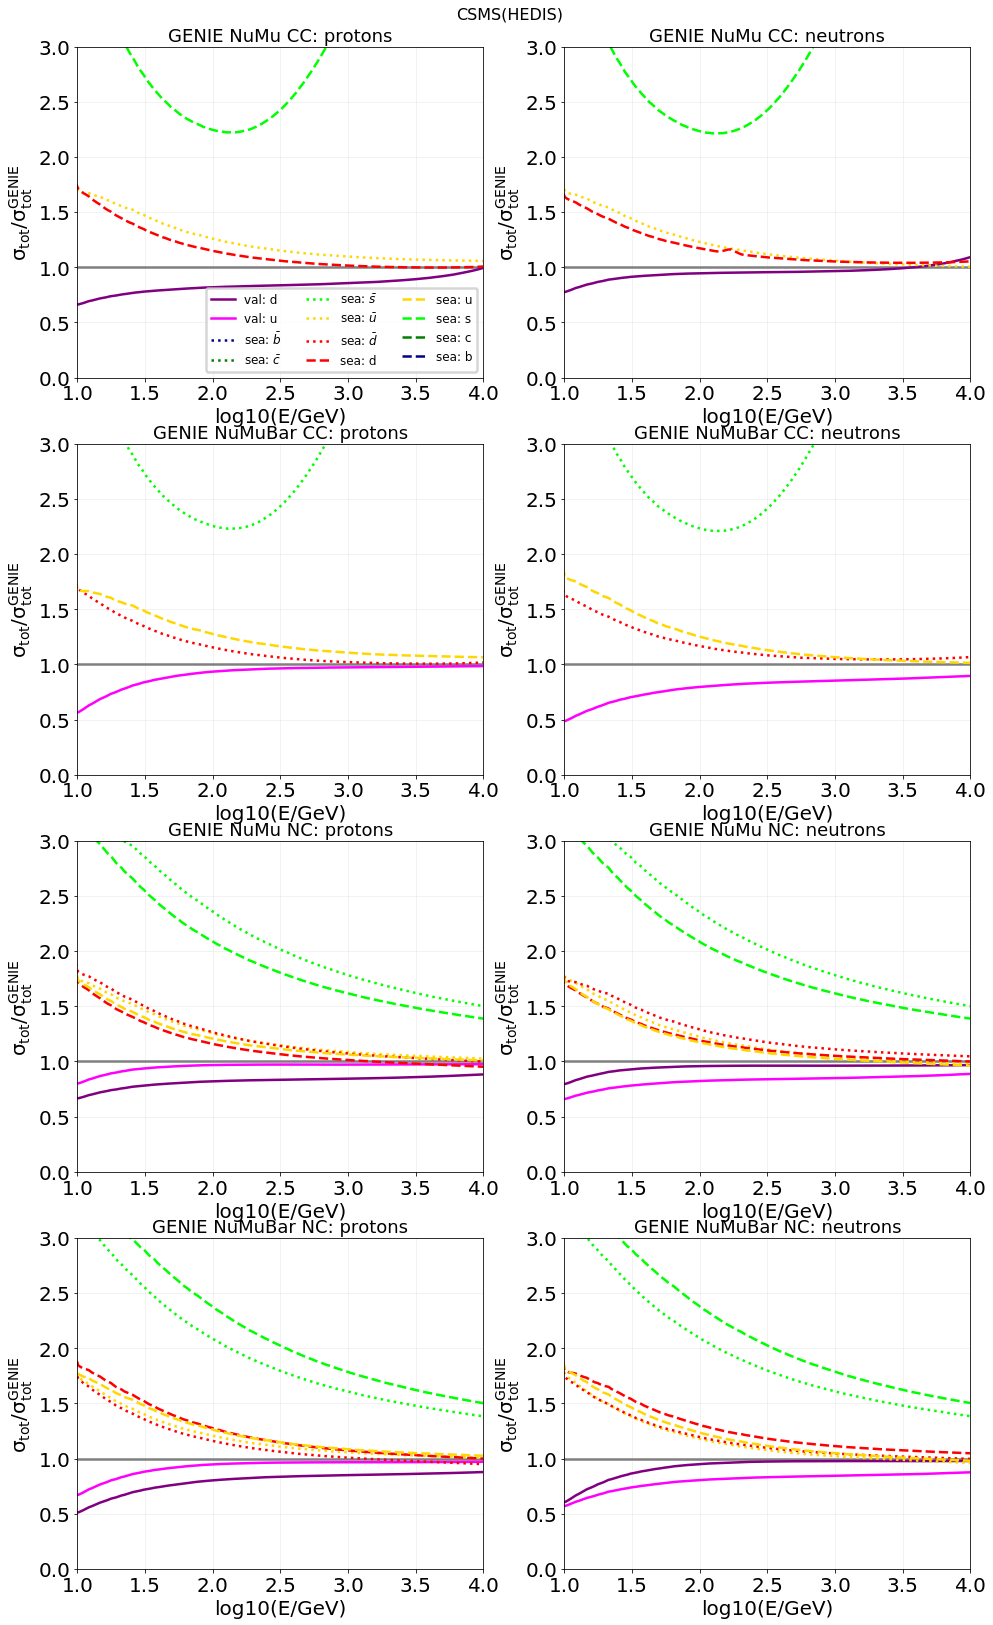

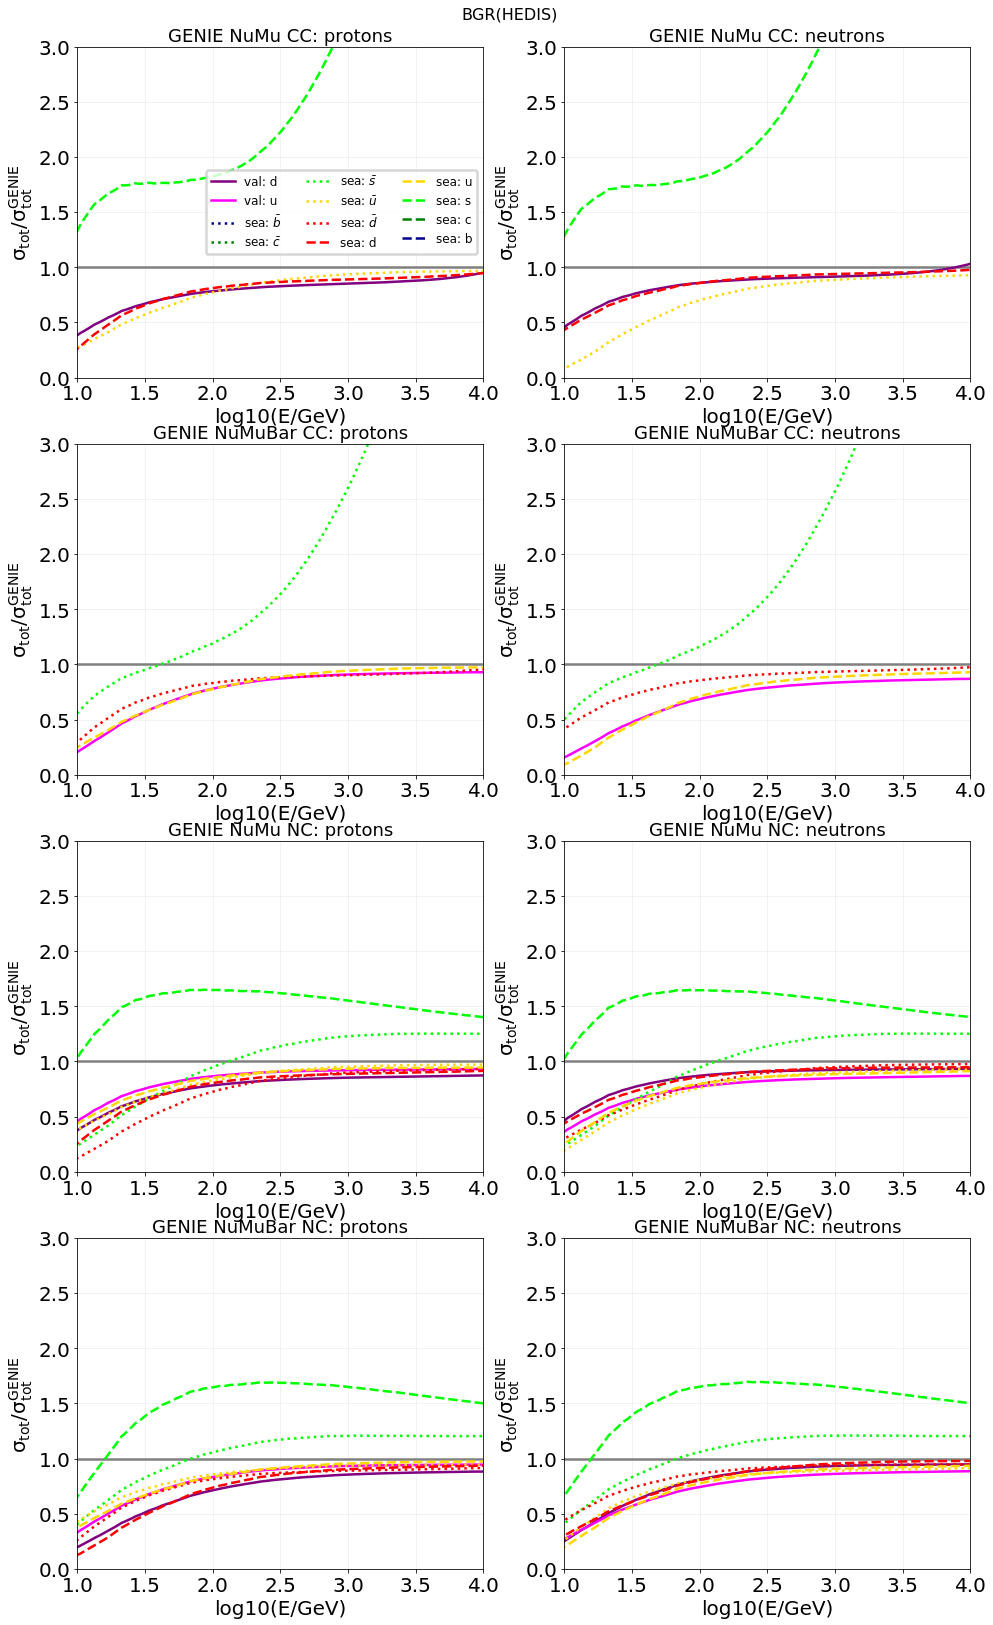

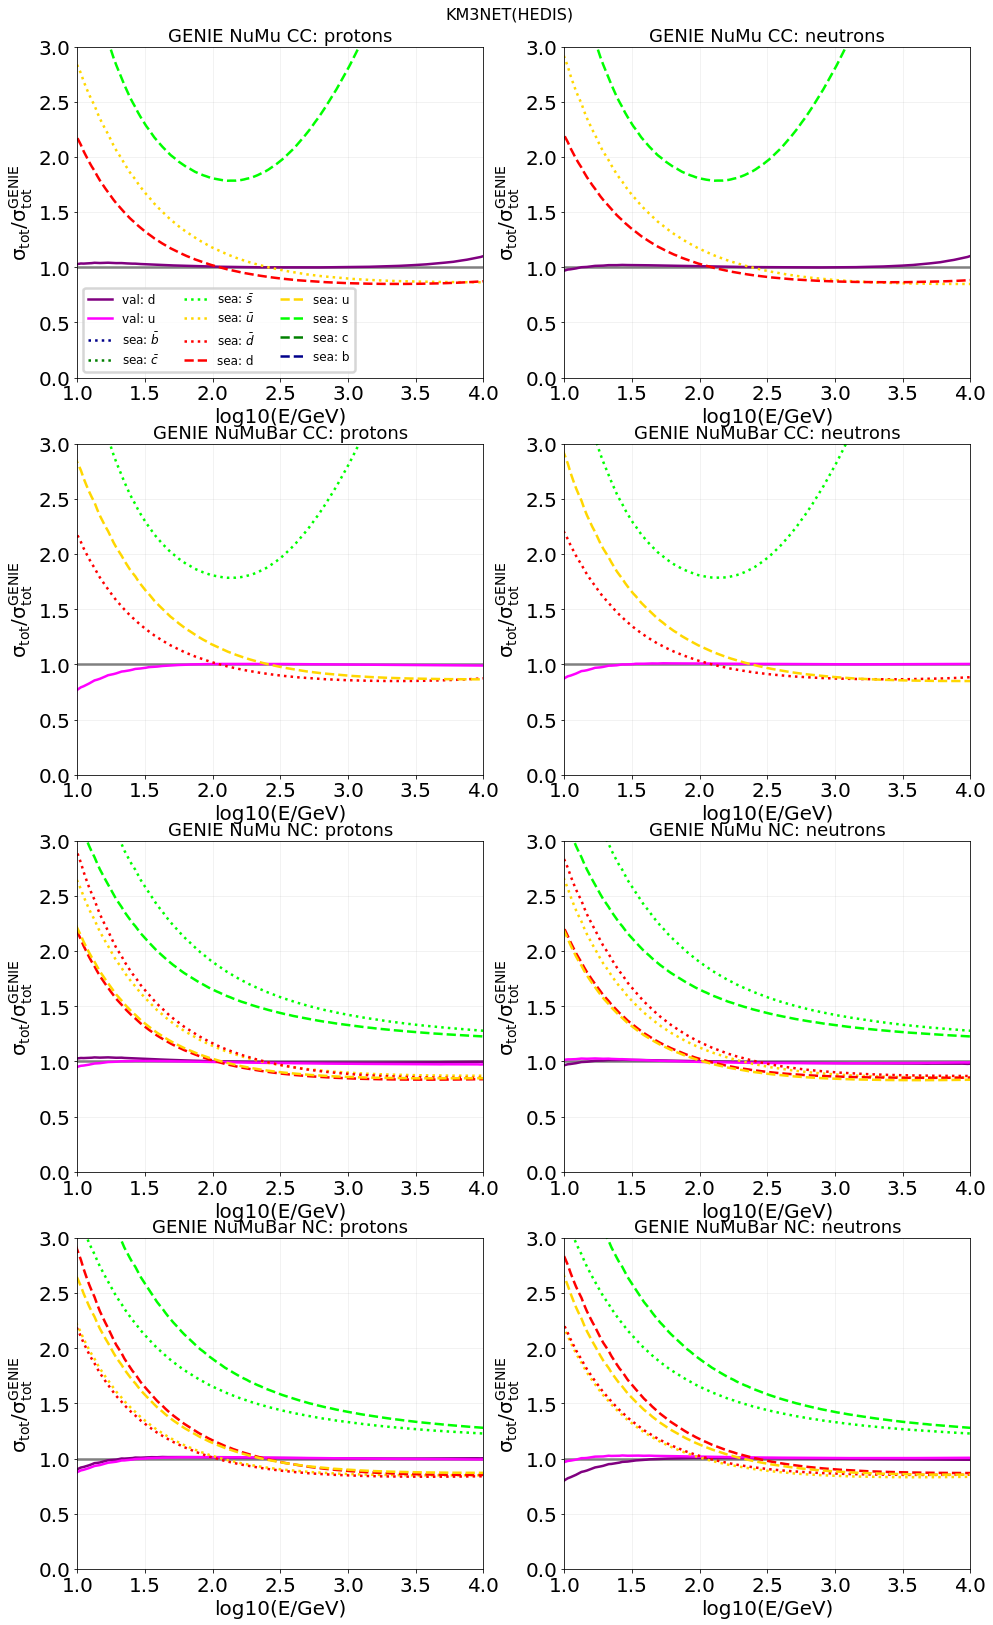

In [20]:
for i in range(len(files)):
    plot_ratios_q(fnames=[files[i]], nu=14, hedis_model=[hedis_models[i]], 
                  genie_det=[genie_dets[i]],
                  filename_base=g2_file)

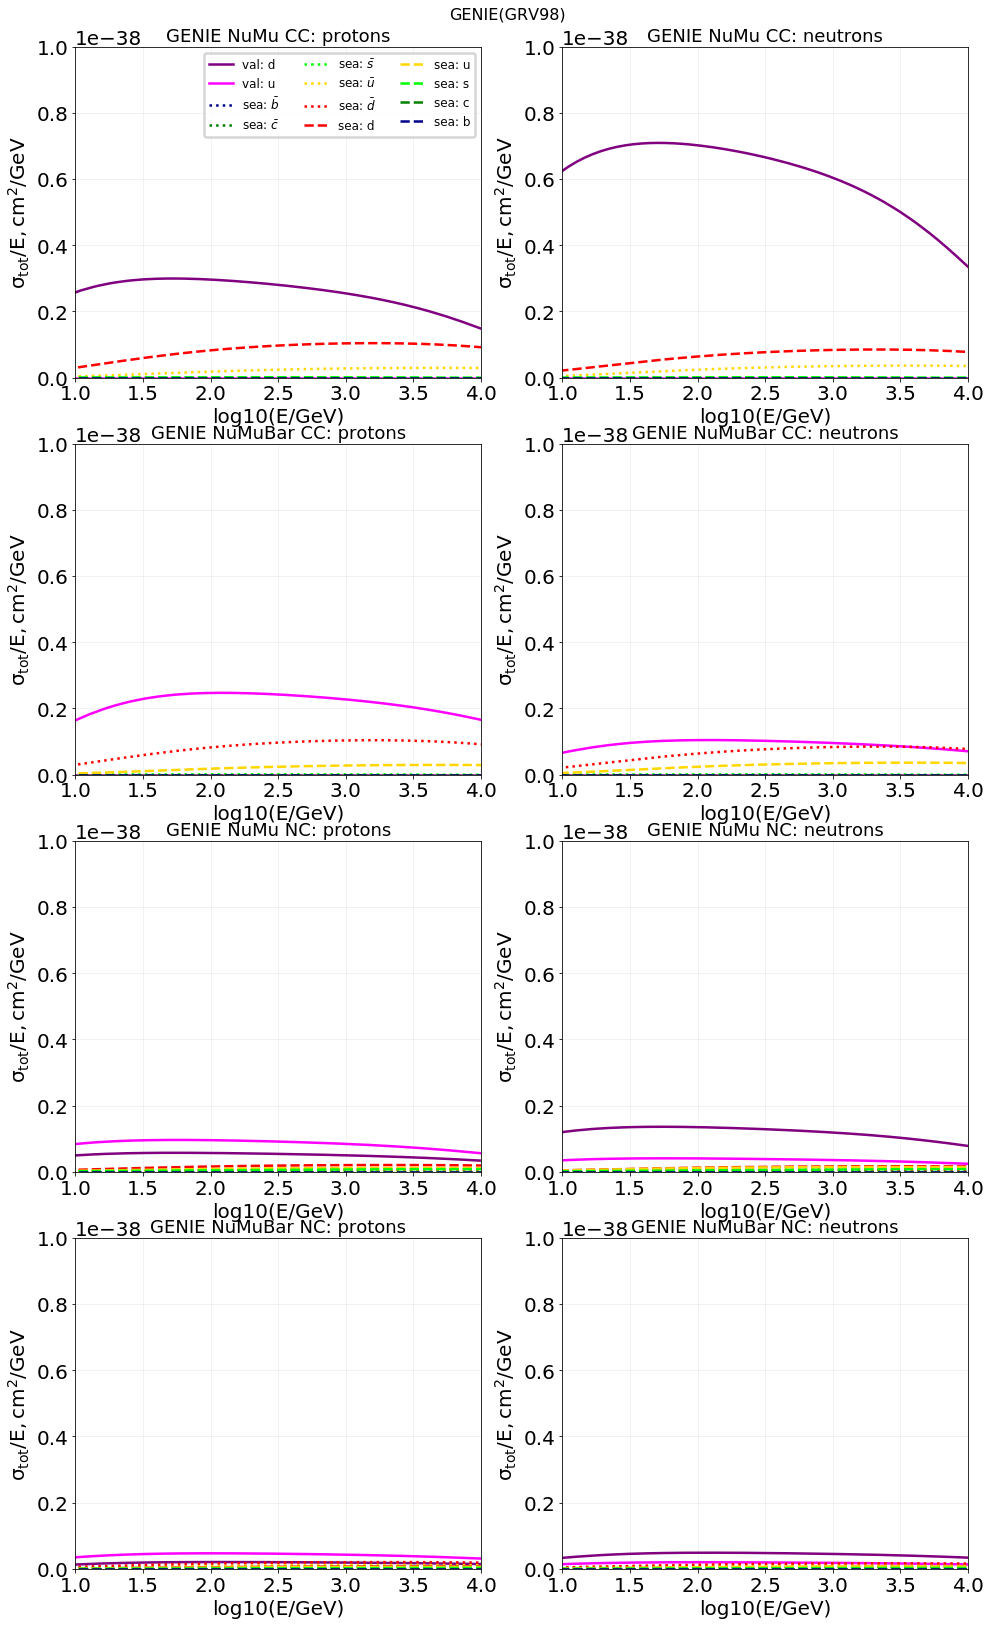

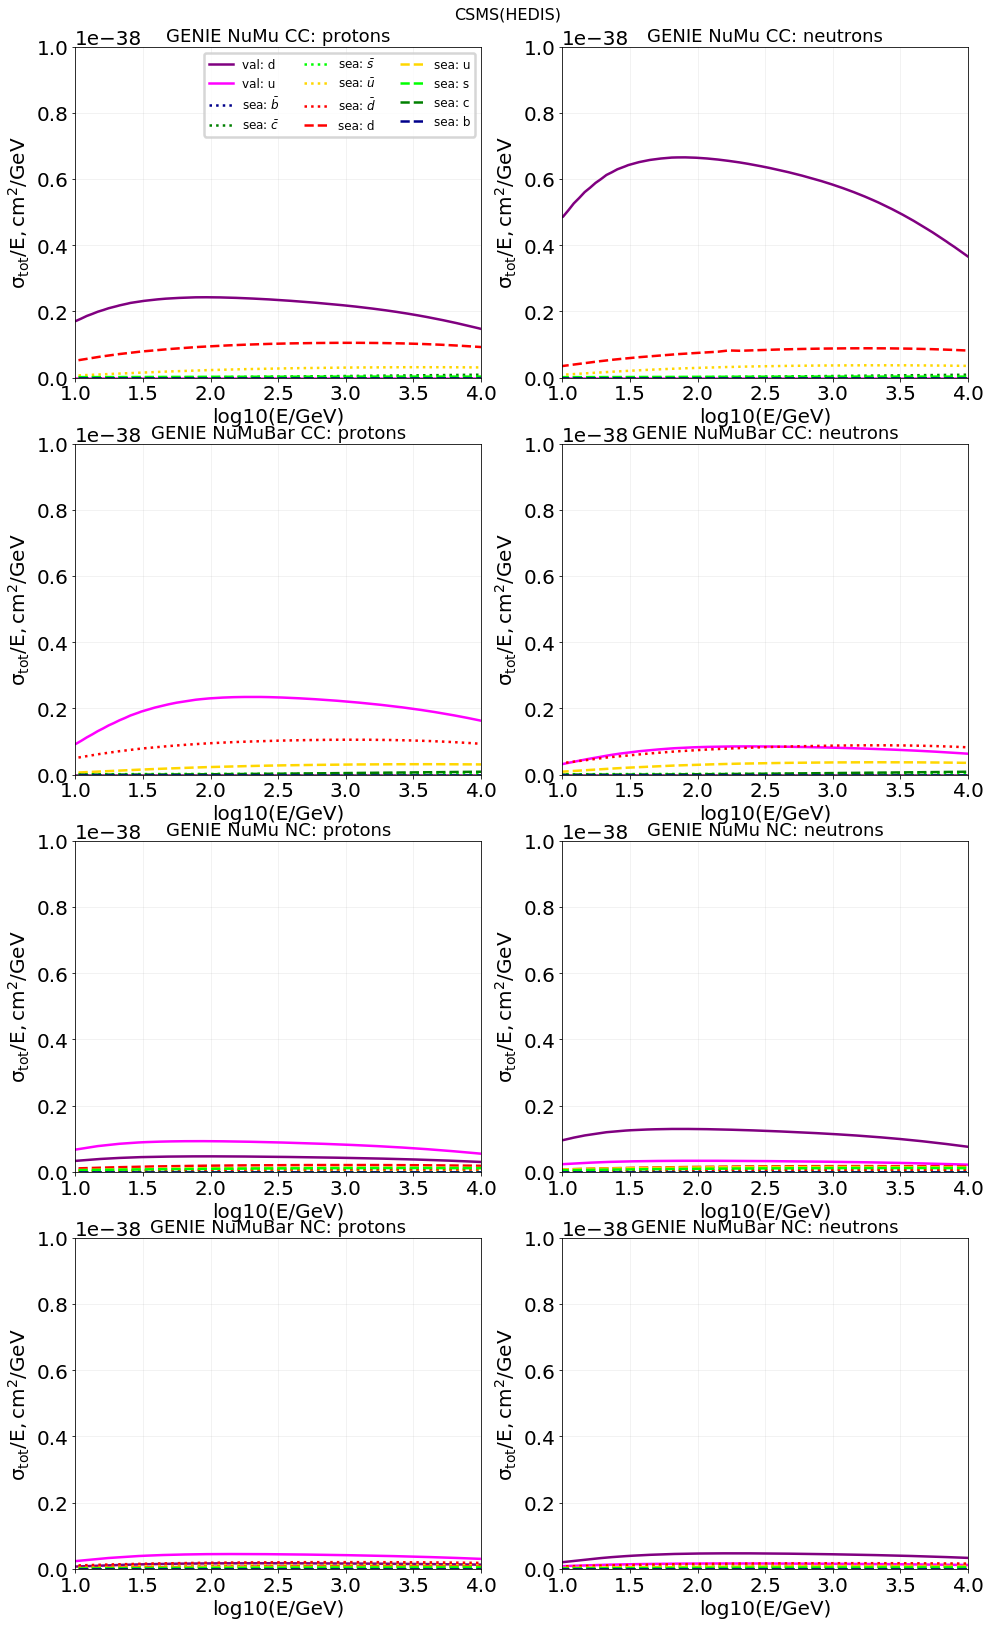

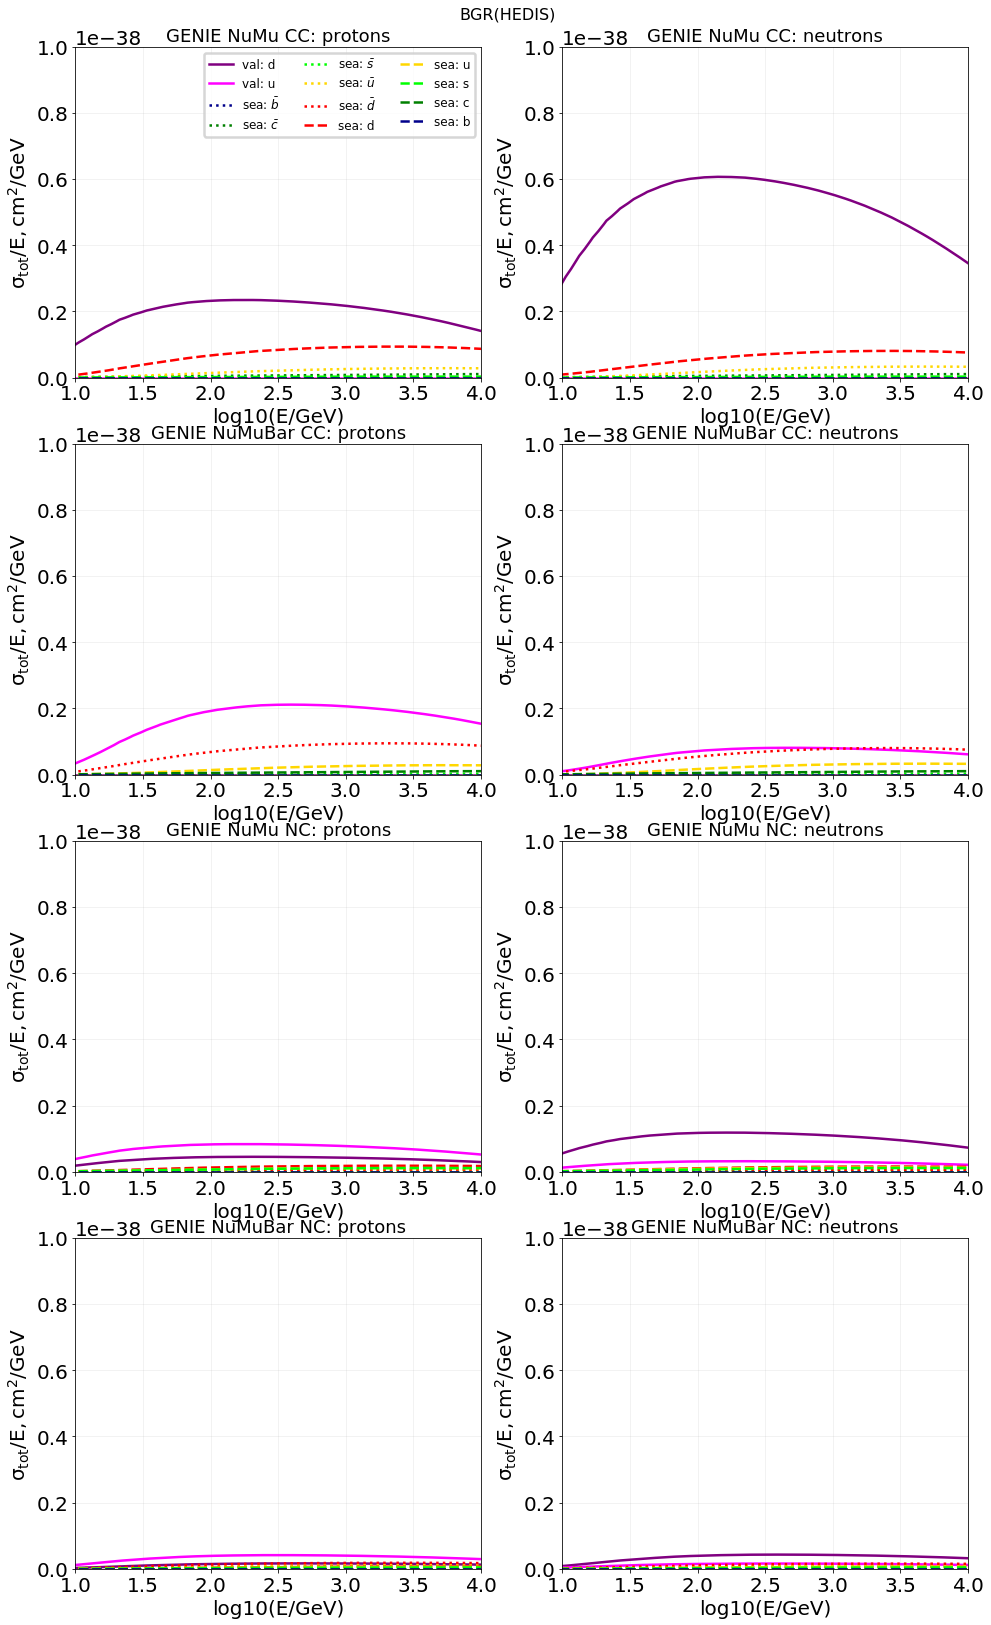

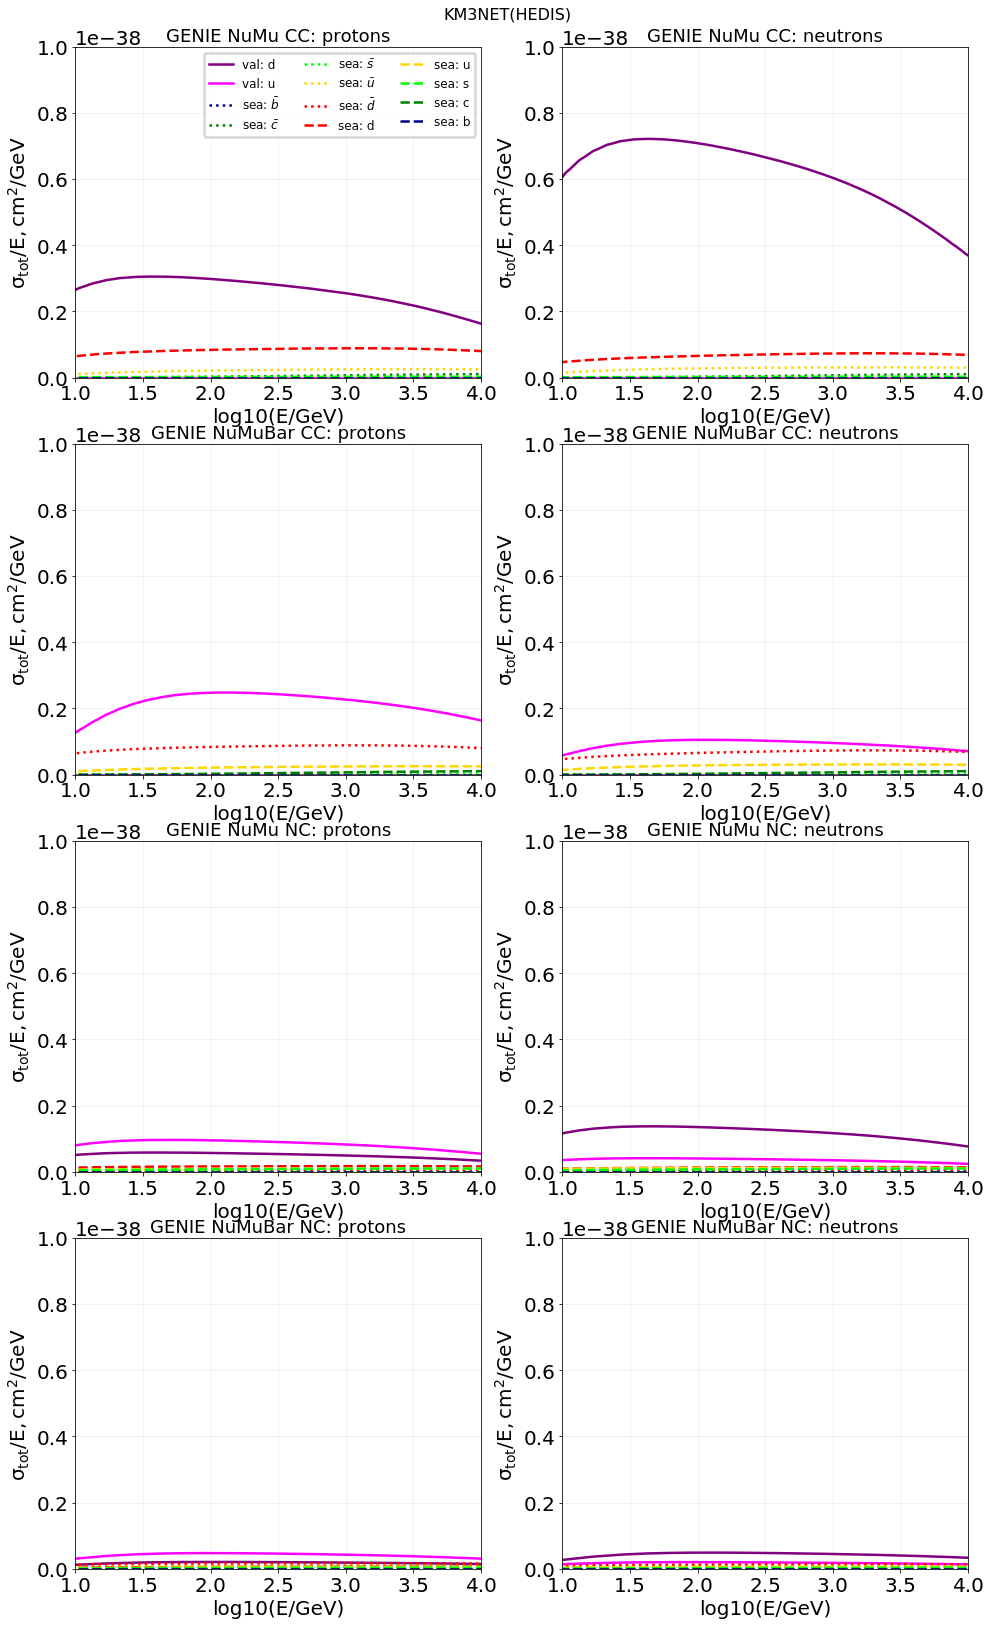

In [21]:
for i in range(len(files)):
    plot_unit_q(fnames=[files[i]], nu=14, hedis_model=[hedis_models[i]], 
                genie_det=[genie_dets[i]])

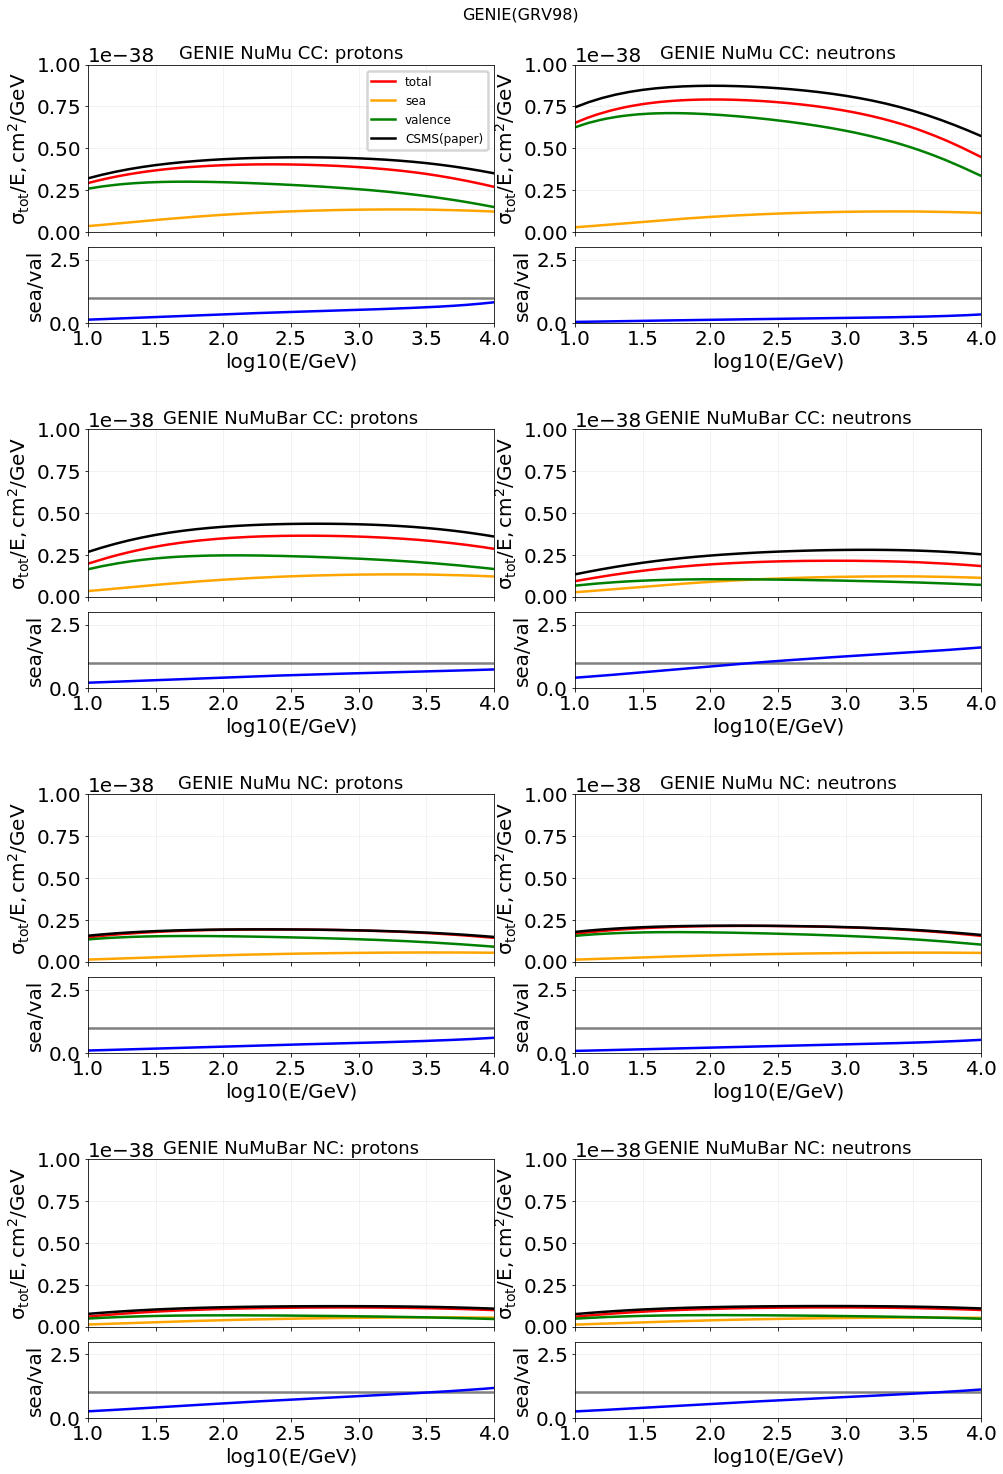

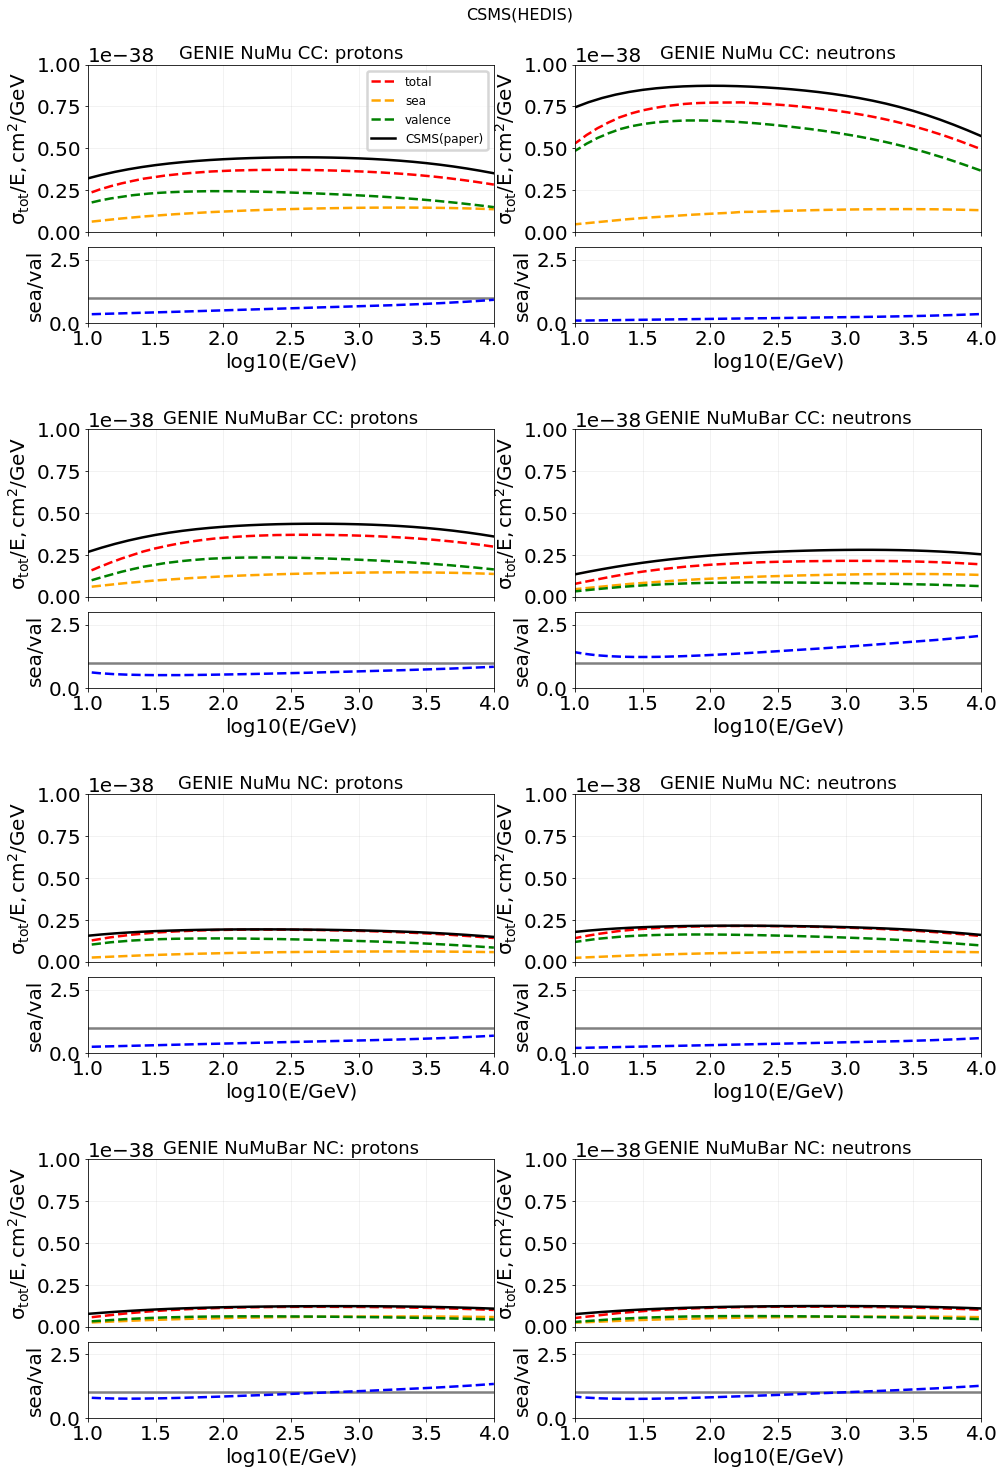

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


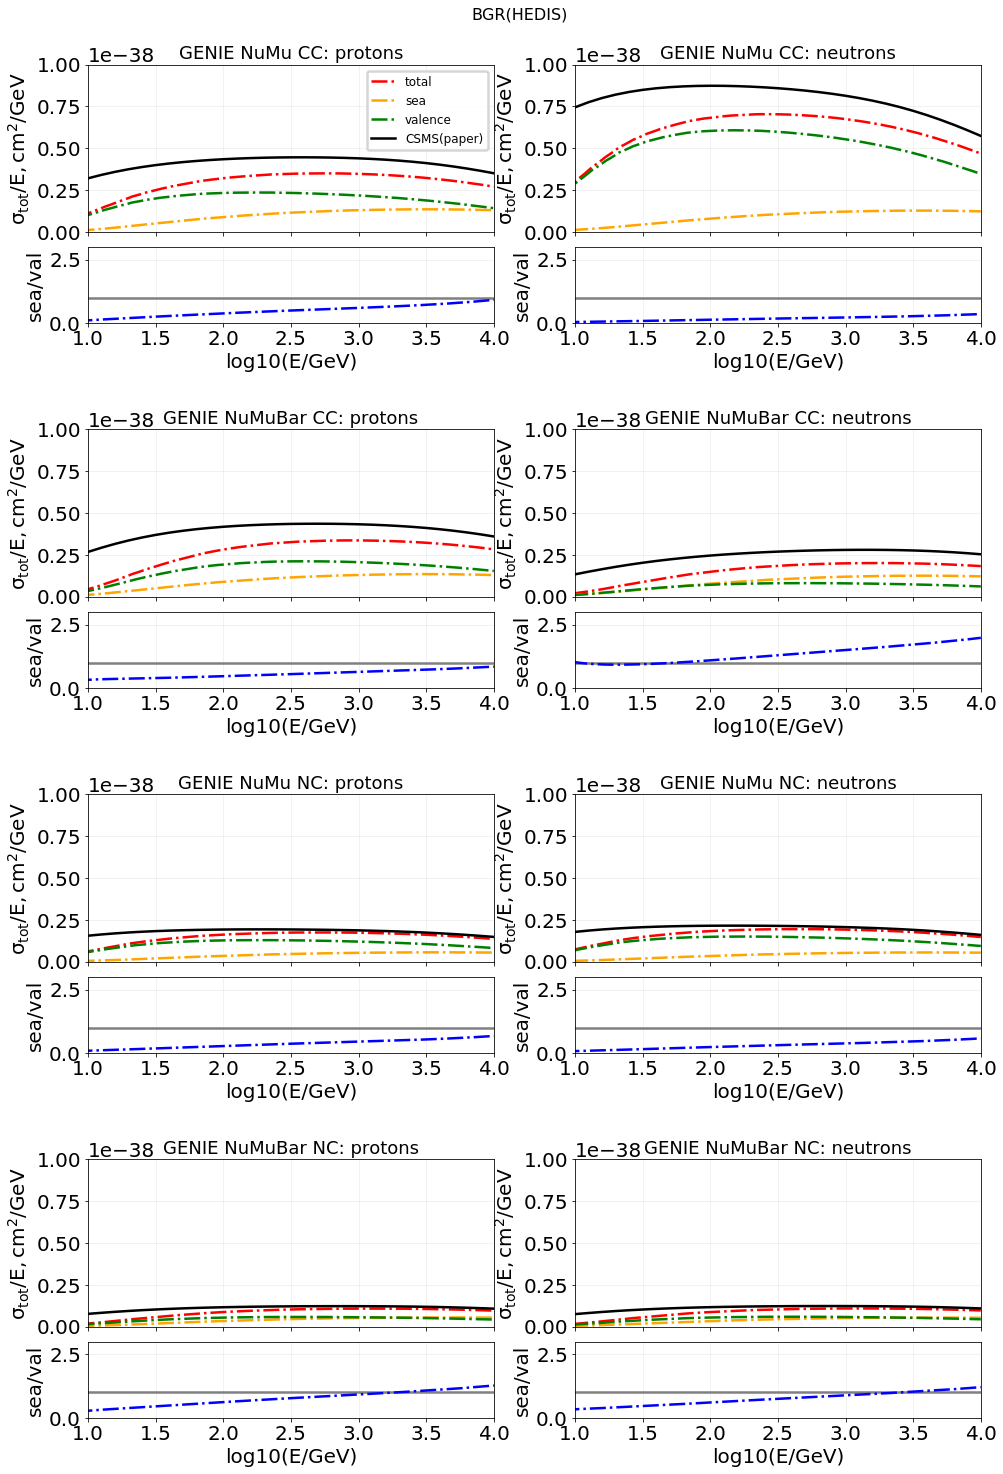

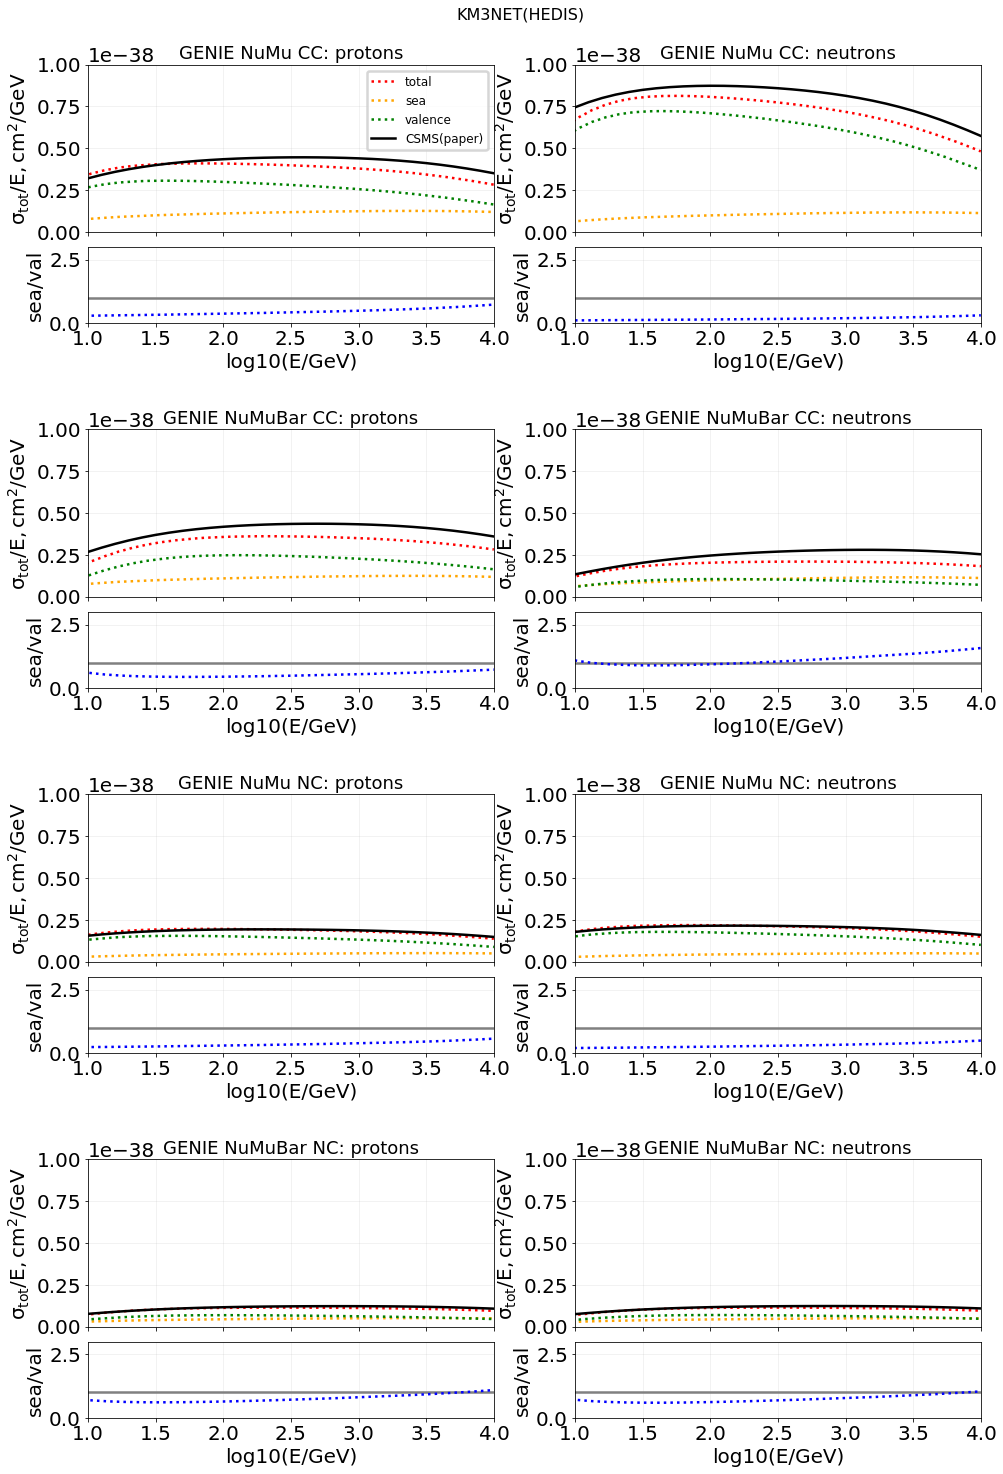

In [22]:
for i in range(len(files)):
    plot_unit(fnames=[files[i]], nu=14, hedis_model=[hedis_models[i]], 
              genie_det=[genie_dets[i]], 
              linestyles=[linestyles[i]])

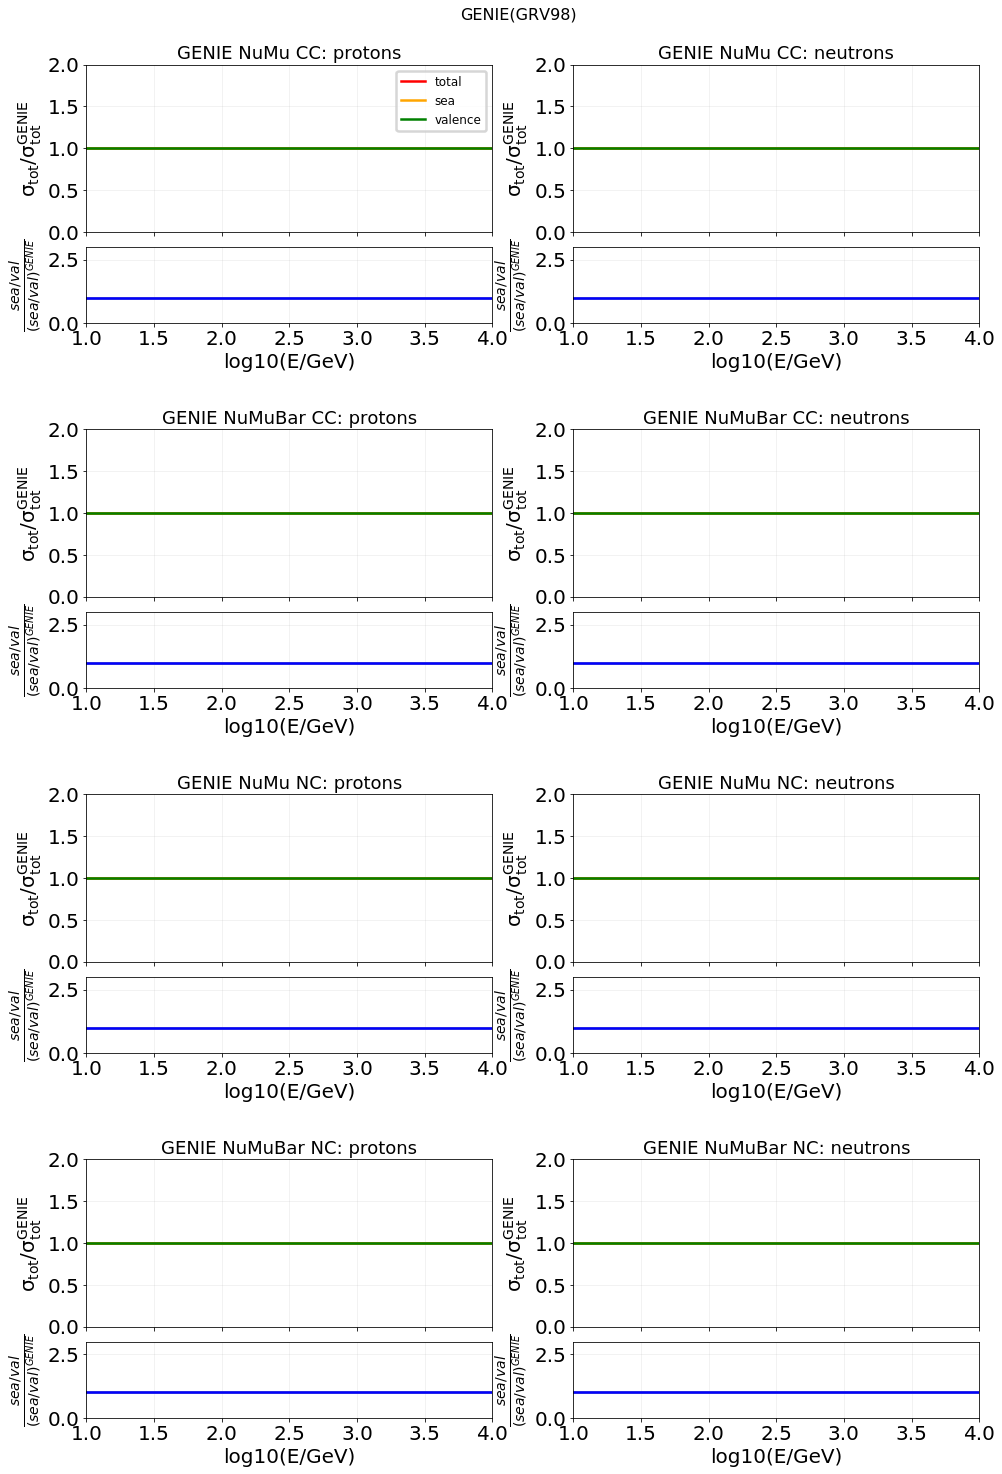

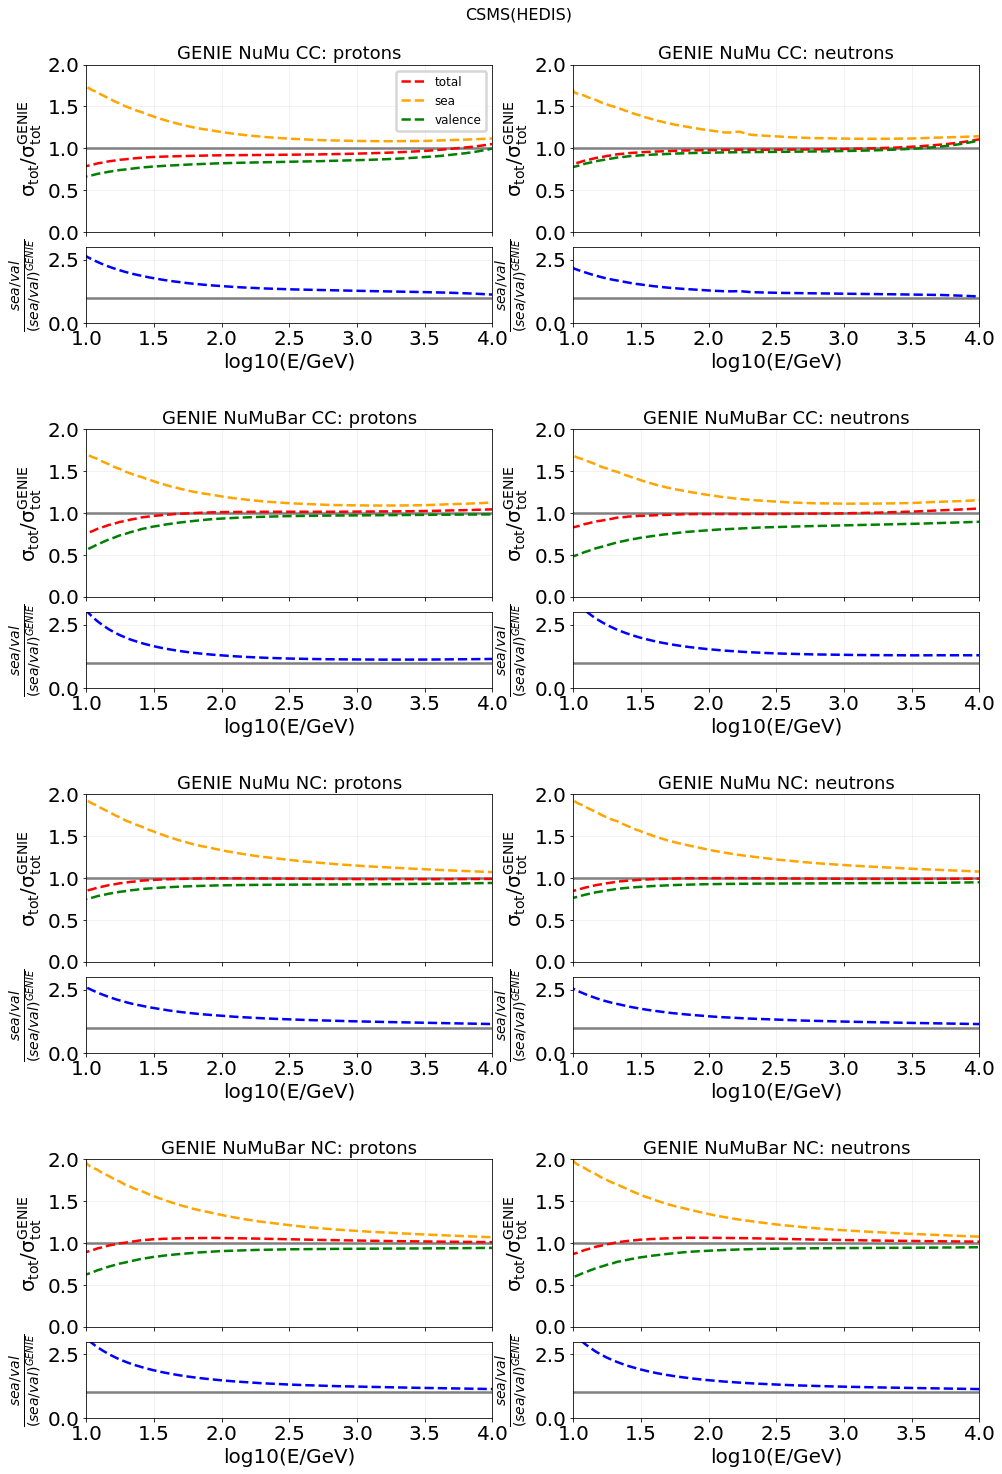

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


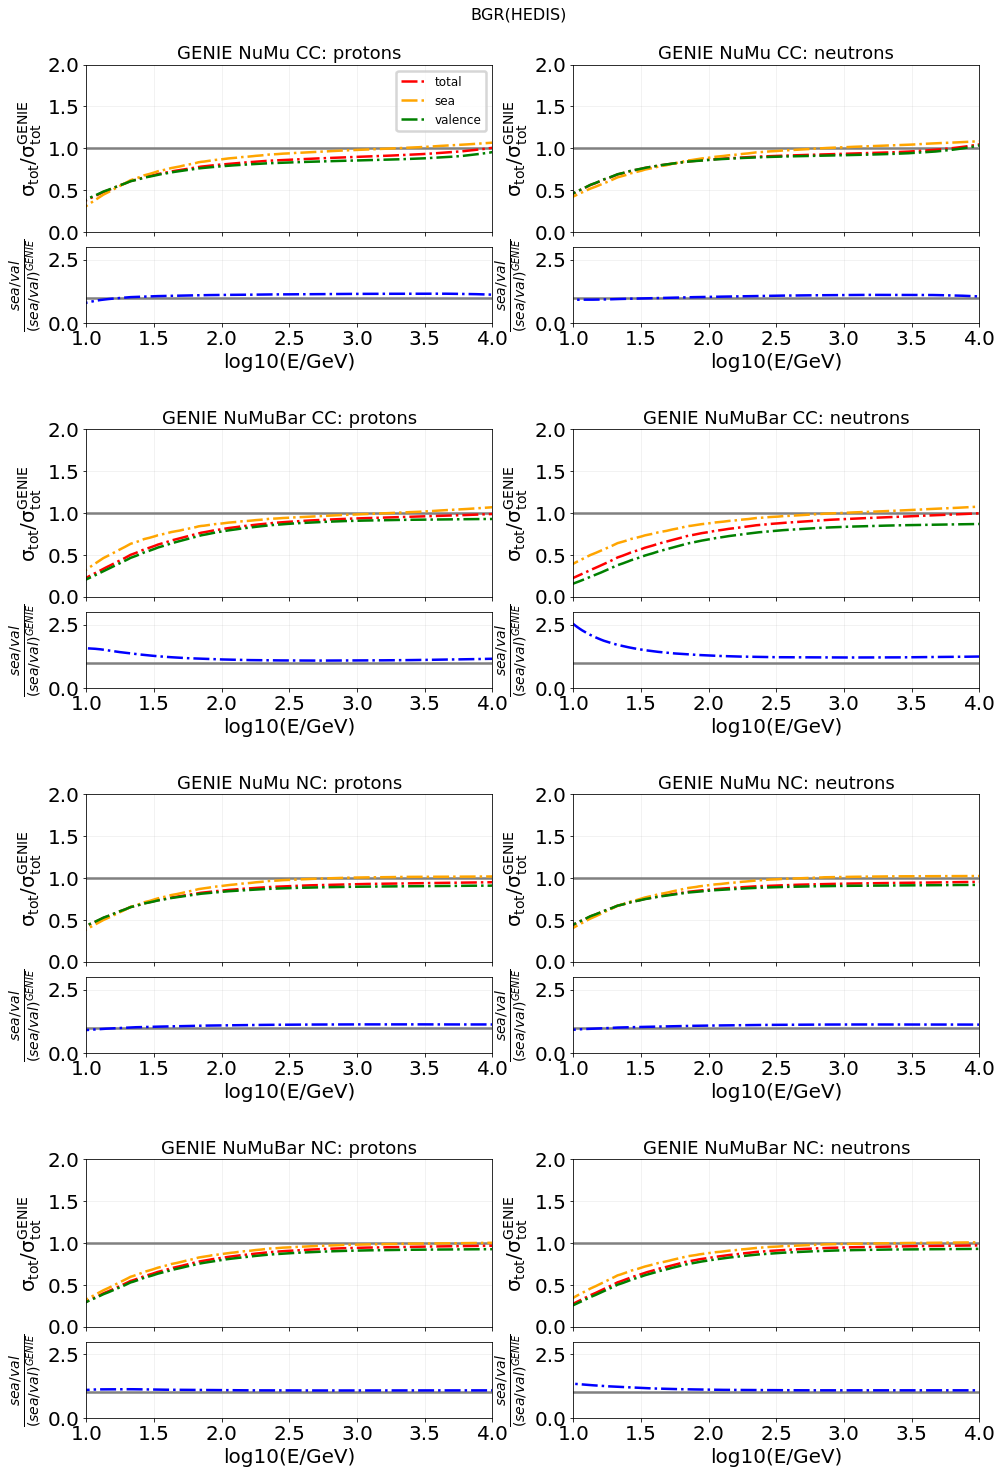

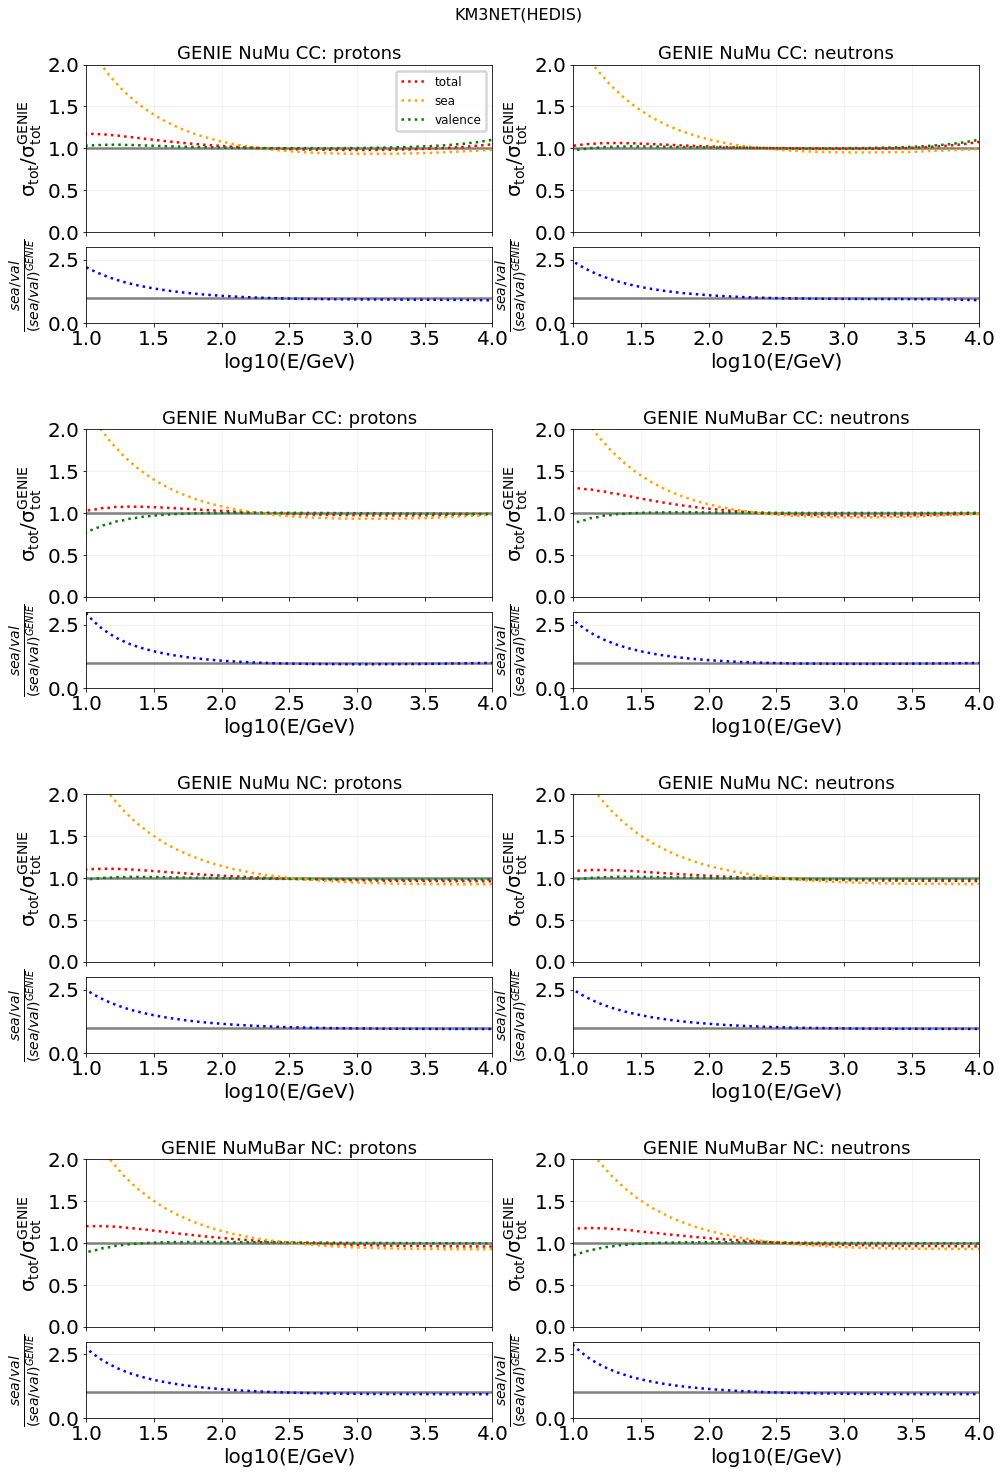

In [23]:
for i in range(len(files)):
    plot_ratios(fnames=[files[i]], nu=14, hedis_model=[hedis_models[i]], 
                genie_det=[genie_dets[i]], 
                linestyles=[linestyles[i]],
                filename_base=g2_file)

# summary

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


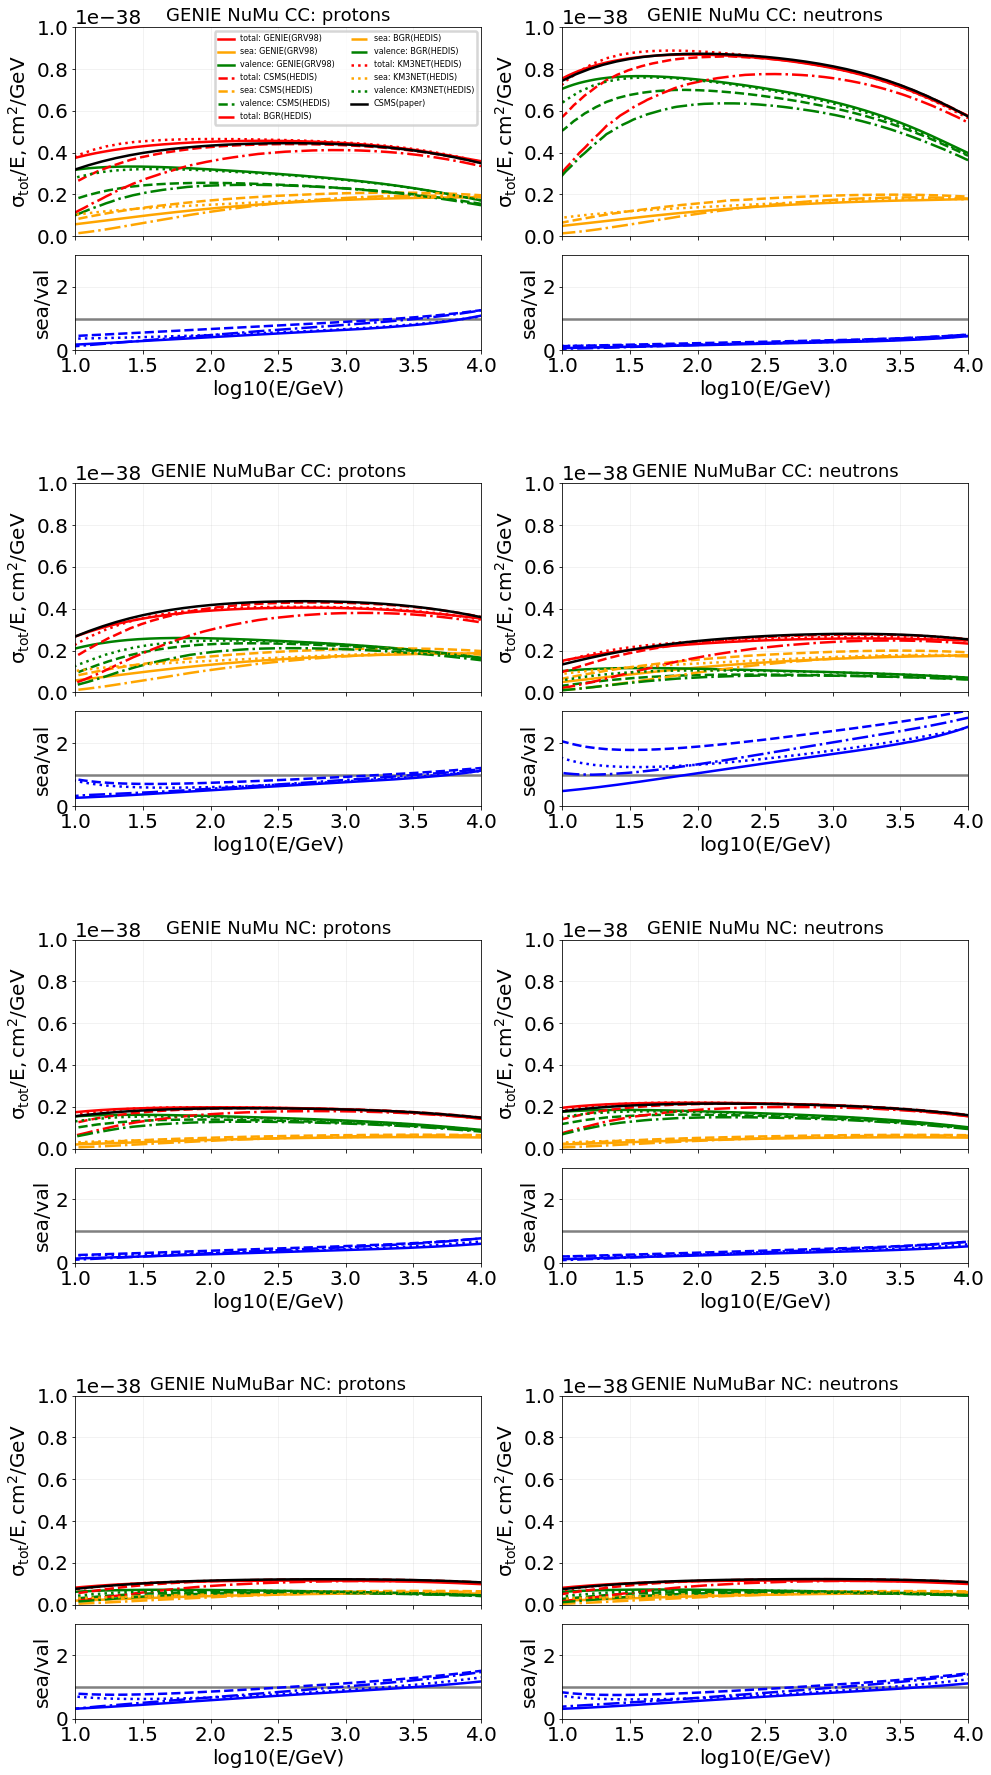

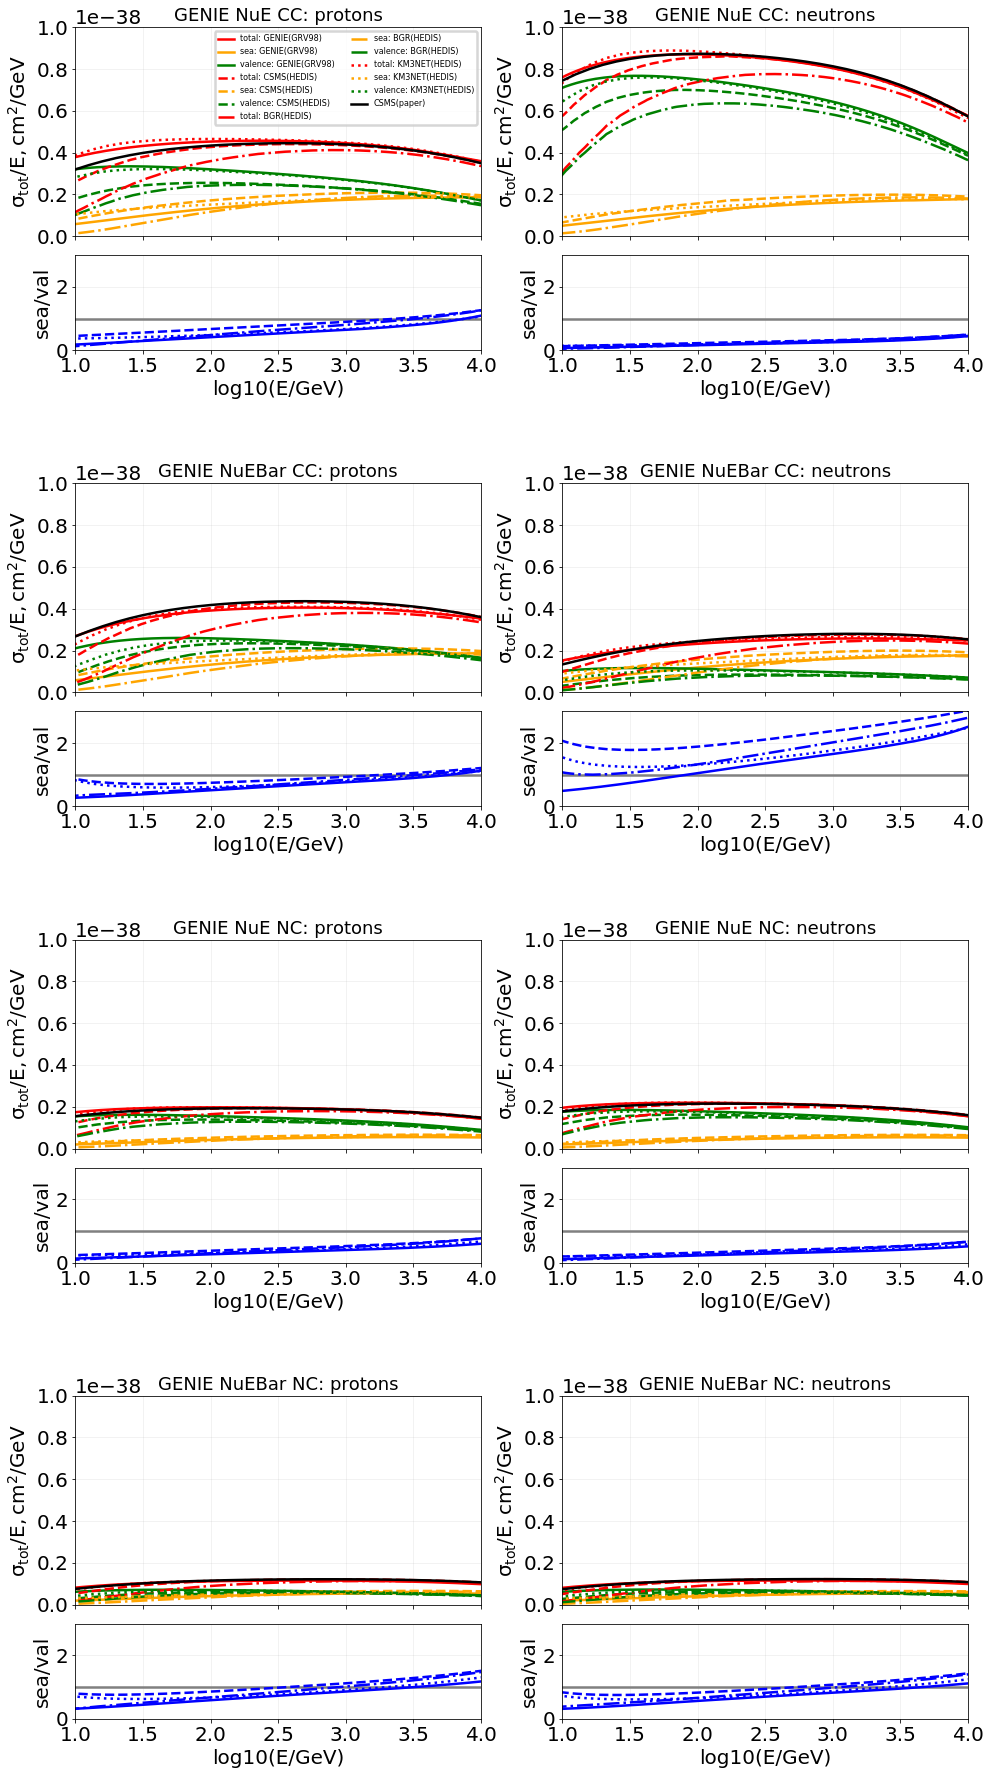

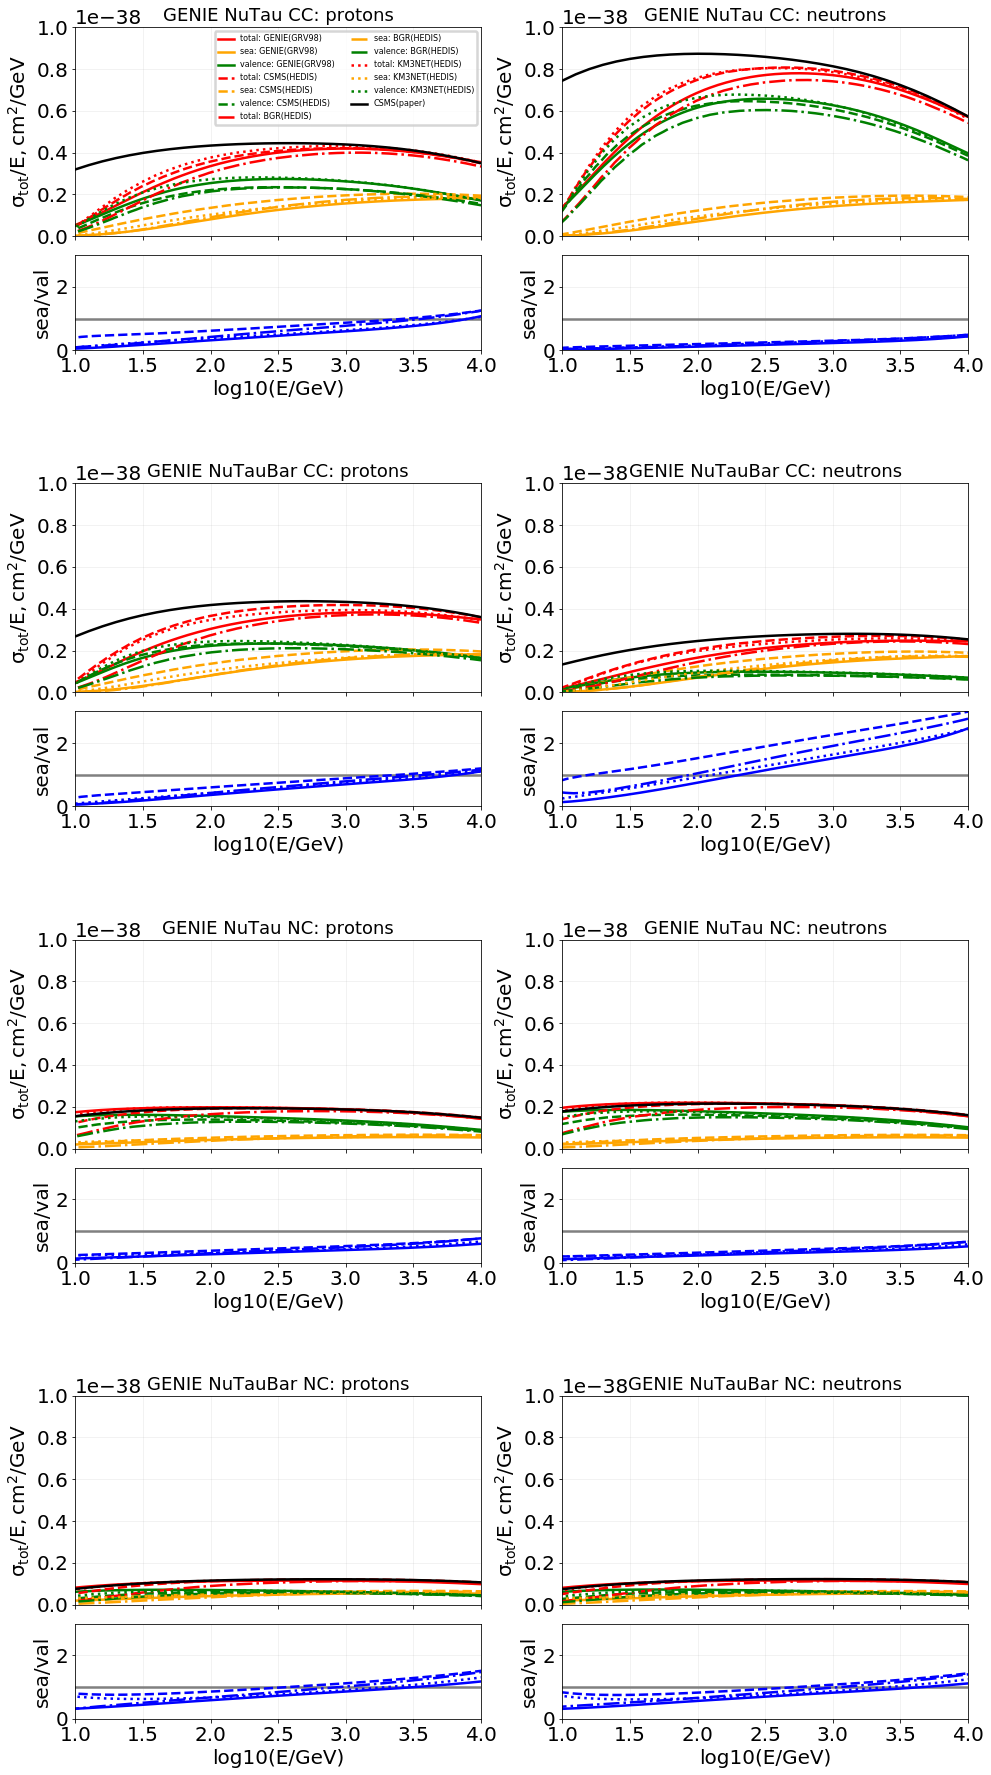

0

In [12]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

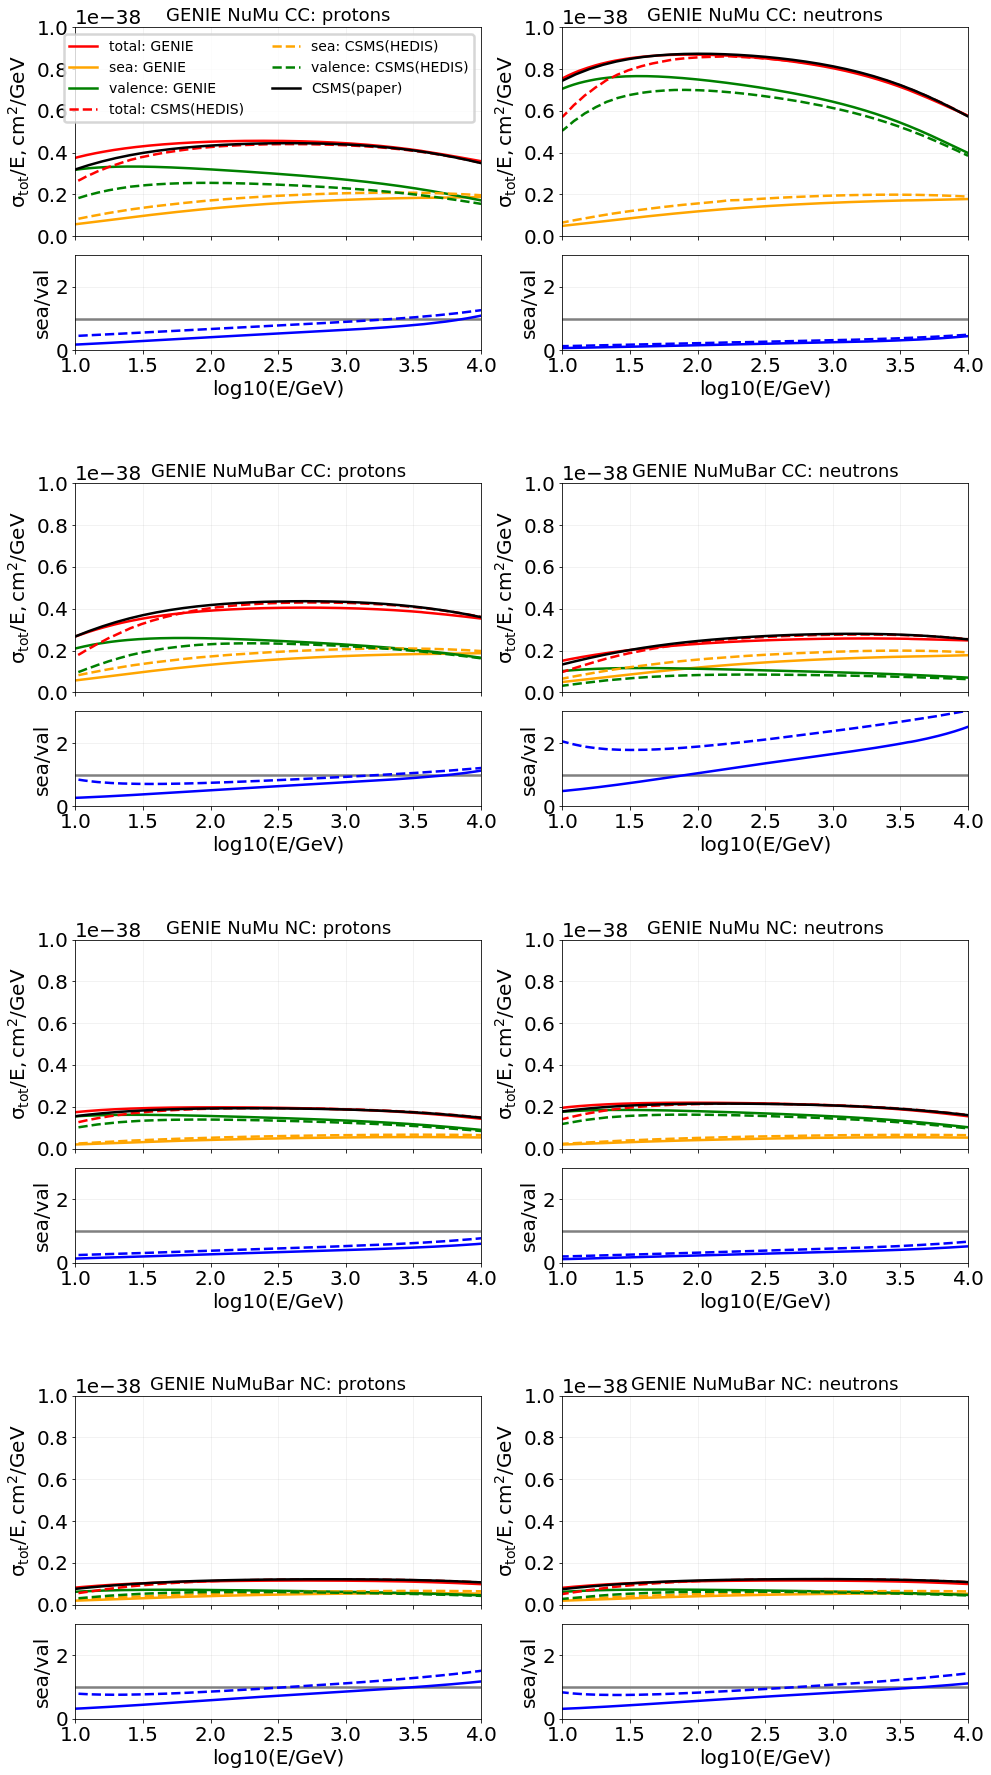

0

In [45]:
plot_unit(fnames=[g2_file,hedis_file], nu=14)